#### CIND820 Capstone Project:      
# Implementing Machine Learning Price Prediction with the Ames Housing Dataset

### Setting Up Environment

Importing necessary libraries and modules

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, cross_val_score
from scipy.stats import skew, norm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, make_scorer
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, LassoCV
import webbrowser

In [2]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

Setting up display options for pandas

In [3]:
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## 1. Basic Data Understanding & Data Cleaning

Loading and checking over dataset

In [111]:
amesH_data = pd.read_excel('data/AmesHousing.xls')

In [5]:
amesH_data.head(10)

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL       141.000     31770   Pave   
1      2  526350040           20        RH        80.000     11622   Pave   
2      3  526351010           20        RL        81.000     14267   Pave   
3      4  526353030           20        RL        93.000     11160   Pave   
4      5  527105010           60        RL        74.000     13830   Pave   
5      6  527105030           60        RL        78.000      9978   Pave   
6      7  527127150          120        RL        41.000      4920   Pave   
7      8  527145080          120        RL        43.000      5005   Pave   
8      9  527146030          120        RL        39.000      5389   Pave   
9     10  527162130           60        RL        60.000      7500   Pave   

  Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0   NaN       IR1          Lvl    AllPub     Corner        Gtl        NAmes   
1   NaN       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
2   NaN       IR1          Lvl    AllPub     Corner        Gtl        NAmes   
3   NaN       Reg          Lvl    AllPub     Corner        Gtl        NAmes   
4   NaN       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   
5   NaN       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   
6   NaN       Reg          Lvl    AllPub     Inside        Gtl      StoneBr   
7   NaN       IR1          HLS    AllPub     Inside        Gtl      StoneBr   
8   NaN       IR1          Lvl    AllPub     Inside        Gtl      StoneBr   
9   NaN       Reg          Lvl    AllPub     Inside        Gtl      Gilbert   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        Norm        Norm      1Fam      1Story             6             5   
1       Feedr        Norm      1Fam      1Story             5             6   
2        Norm        Norm      1Fam      1Story             6             6   
3        Norm        Norm      1Fam      1Story             7             5   
4        Norm        Norm      1Fam      2Story             5             5   
5        Norm        Norm      1Fam      2Story             6             6   
6        Norm        Norm    TwnhsE      1Story             8             5   
7        Norm        Norm    TwnhsE      1Story             8             5   
8        Norm        Norm    TwnhsE      1Story             8             5   
9        Norm        Norm      1Fam      2Story             7             5   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1960            1960        Hip   CompShg      BrkFace      Plywood   
1        1961            1961      Gable   CompShg      VinylSd      VinylSd   
2        1958            1958        Hip   CompShg      Wd Sdng      Wd Sdng   
3        1968            1968        Hip   CompShg      BrkFace      BrkFace   
4        1997            1998      Gable   CompShg      VinylSd      VinylSd   
5        1998            1998      Gable   CompShg      VinylSd      VinylSd   
6        2001            2001      Gable   CompShg      CemntBd      CmentBd   
7        1992            1992      Gable   CompShg      HdBoard      HdBoard   
8        1995            1996      Gable   CompShg      CemntBd      CmentBd   
9        1999            1999      Gable   CompShg      VinylSd      VinylSd   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0        Stone       112.000         TA         TA     CBlock        TA   
1         None         0.000         TA         TA     CBlock        TA   
2      BrkFace       108.000         TA         TA     CBlock        TA   
3         None         0.000         Gd         TA     CBlock        TA   
4         None         0.000         TA         TA      PConc        Gd   
5      BrkFace        20.000         TA         TA      PConc        TA   
6        

In [6]:
amesH_data.shape

(2930, 82)

In [7]:
amesH_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

Checking for Duplicate Values

In [8]:
uniqID = len(set(amesH_data.PID))
totalID = amesH_data.shape[0]
duplID = totalID - uniqID
duplID


0

Setting the target variable

In [9]:
target = amesH_data['SalePrice']

Basic Summary Statistics for Target

In [10]:
T_Summary = amesH_data['SalePrice'].describe()
T_mode = amesH_data['SalePrice'].mode()
T_Summary.loc['mode'] = T_mode.iloc[0]
T_Summary.loc['skew']=amesH_data['SalePrice'].skew()
T_Summary.loc['kurt'] = amesH_data['SalePrice'].kurt()
T_Summary.loc['Na'] = amesH_data['SalePrice'].isna().sum()
T_Summary.loc['dtype']= amesH_data['SalePrice'].dtypes
T_Summary

count     2930.000
mean    180796.060
std      79886.692
min      12789.000
25%     129500.000
50%     160000.000
75%     213500.000
max     755000.000
mode    135000.000
skew         1.744
kurt         5.119
Na           0.000
dtype        int64
Name: SalePrice, dtype: object

Creating indexes for discrete, continuous, ordinal, and nominal features while displaying the number of each type of feature.

In [11]:
discFeat = ['Year Built', 'Year Remod/Add', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces','Garage Yr Blt', 'Garage Cars', 'Yr Sold']
len(discFeat)

13

In [12]:
contFeat = ['Lot Frontage', 'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val']
len(contFeat)

19

In [13]:
ordF = ['Street', 'Alley','Lot Shape', 'Utilities', 'Land Slope', 'Overall Qual', 'Overall Cond', 'Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating QC', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence']
len(ordF)

25

In [14]:
nomF = ['MS SubClass', 'MS Zoning', 'Land Contour', 'Lot Config', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating', 'Central Air', 'Garage Type', 'Misc Feature', 'Mo Sold', 'Sale Type', 'Sale Condition']
len(nomF)

22

## 1. Basic Summary Statistics for Discrete Features

In [15]:
discFeat_Summary = amesH_data[discFeat].describe()
d_mode = amesH_data[discFeat].mode()
discFeat_Summary.loc['mode'] = d_mode.iloc[0]
discFeat_Summary.loc['skew']=amesH_data[discFeat].skew()
discFeat_Summary.loc['kurt'] =amesH_data[discFeat].kurt()
discFeat_Summary.loc['Na'] = amesH_data[discFeat].isna().sum()
discFeat_Summary.loc['dtype'] = amesH_data[discFeat].dtypes
discFeat_Summary

Year Built Year Remod/Add Bsmt Full Bath Bsmt Half Bath Full Bath  \
count   2930.000       2930.000       2928.000       2928.000  2930.000   
mean    1971.356       1984.267          0.431          0.061     1.567   
std       30.245         20.860          0.525          0.245     0.553   
min     1872.000       1950.000          0.000          0.000     0.000   
25%     1954.000       1965.000          0.000          0.000     1.000   
50%     1973.000       1993.000          0.000          0.000     2.000   
75%     2001.000       2004.000          1.000          0.000     2.000   
max     2010.000       2010.000          3.000          2.000     4.000   
mode    2005.000       1950.000          0.000          0.000     2.000   
skew      -0.604         -0.452          0.617          3.941     0.172   
kurt      -0.502         -1.342         -0.748         14.922    -0.541   
Na         0.000          0.000          2.000          2.000     0.000   
dtype      int64          int64        float64        float64     int64   

      Half Bath Bedroom AbvGr Kitchen AbvGr TotRms AbvGrd Fireplaces  \
count  2930.000      2930.000      2930.000      2930.000   2930.000   
mean      0.380         2.854         1.044         6.443      0.599   
std       0.503         0.828         0.214         1.573      0.648   
min       0.000         0.000         0.000         2.000      0.000   
25%       0.000         2.000         1.000         5.000      0.000   
50%       0.000         3.000         1.000         6.000      1.000   
75%       1.000         3.000         1.000         7.000      1.000   
max       2.000         8.000         3.000        15.000      4.000   
mode      0.000         3.000         1.000         6.000      0.000   
skew      0.698         0.306         4.314         0.754      0.739   
kurt     -1.030         1.891        19.870         1.155      0.102   
Na        0.000         0.000         0.000         0.000      0.000   
dtype     int64         int64         int64         int64      int64   

      Garage Yr Blt Garage Cars  Yr Sold  
count      2771.000    2929.000 2930.000  
mean       1978.132       1.767 2007.790  
std          25.528       0.761    1.317  
min        1895.000       0.000 2006.000  
25%        1960.000       1.000 2007.000  
50%        1979.000       2.000 2008.000  
75%        2002.000       2.000 2009.000  
max        2207.000       5.000 2010.000  
mode       2005.000       2.000 2007.000  
skew         -0.385      -0.220    0.135  
kurt          1.827       0.245   -1.158  
Na          159.000       1.000    0.000  
dtype       float64     float64    int64

#### Handling discrete NaNs
In the case of categories like Basement Full Bath and Garage Cars, we would expect that a NaN value indicates the absence of that particular feature.  As such, we fill the missing values with 0.

In [16]:
amesH_data.loc[:, ['Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Yr Blt', 'Garage Cars']] = amesH_data.loc[:, ['Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Yr Blt', 'Garage Cars']].fillna(0)

In [17]:
# nullGarage = amesH_data.loc[:,'Garage Yr Blt'].isna()
# amesH_data[nullGarage].iloc[4,32]
#for x in amesH_data[nullGarage]

### Basic Summary Statistics for Continuous Features

In [18]:
contFeat_Summary = amesH_data[contFeat].describe()
c_mode = amesH_data[contFeat].mode()
contFeat_Summary.loc['mode'] = c_mode.iloc[0]
contFeat_Summary.loc['skew'] = amesH_data[contFeat].skew()
contFeat_Summary.loc['kurt'] = amesH_data[contFeat].skew()
contFeat_Summary.loc['Na'] = amesH_data[contFeat].isna().sum()
contFeat_Summary.loc['dtype'] = amesH_data[contFeat].dtypes
contFeat_Summary

Lot Frontage   Lot Area Mas Vnr Area BsmtFin SF 1 BsmtFin SF 2  \
count     2440.000   2930.000     2907.000     2929.000     2929.000   
mean        69.225  10147.922      101.897      442.630       49.722   
std         23.365   7880.018      179.113      455.591      169.168   
min         21.000   1300.000        0.000        0.000        0.000   
25%         58.000   7440.250        0.000        0.000        0.000   
50%         68.000   9436.500        0.000      370.000        0.000   
75%         80.000  11555.250      164.000      734.000        0.000   
max        313.000 215245.000     1600.000     5644.000     1526.000   
mode        60.000   9600.000        0.000        0.000        0.000   
skew         1.499     12.821        2.607        1.416        4.140   
kurt         1.499     12.821        2.607        1.416        4.140   
Na         490.000      0.000       23.000        1.000        1.000   
dtype      float64      int64      float64      float64      float64   

      Bsmt Unf SF Total Bsmt SF 1st Flr SF 2nd Flr SF Low Qual Fin SF  \
count    2929.000      2929.000   2930.000   2930.000        2930.000   
mean      559.263      1051.615   1159.558    335.456           4.677   
std       439.494       440.615    391.891    428.396          46.311   
min         0.000         0.000    334.000      0.000           0.000   
25%       219.000       793.000    876.250      0.000           0.000   
50%       466.000       990.000   1084.000      0.000           0.000   
75%       802.000      1302.000   1384.000    703.750           0.000   
max      2336.000      6110.000   5095.000   2065.000        1064.000   
mode        0.000         0.000    864.000      0.000           0.000   
skew        0.923         1.156      1.469      0.866          12.118   
kurt        0.923         1.156      1.469      0.866          12.118   
Na          1.000         1.000      0.000      0.000           0.000   
dtype     float64       float64      int64      int64           int64   

      Gr Liv Area Garage Area Wood Deck SF Open Porch SF Enclosed Porch  \
count    2930.000    2929.000     2930.000      2930.000       2930.000   
mean     1499.690     472.820       93.752        47.533         23.012   
std       505.509     215.047      126.362        67.483         64.139   
min       334.000       0.000        0.000         0.000          0.000   
25%      1126.000     320.000        0.000         0.000          0.000   
50%      1442.000     480.000        0.000        27.000          0.000   
75%      1742.750     576.000      168.000        70.000          0.000   
max      5642.000    1488.000     1424.000       742.000       1012.000   
mode      864.000       0.000        0.000         0.000          0.000   
skew        1.274       0.242        1.843         2.535          4.014   
kurt        1.274       0.242        1.843         2.535          4.014   
Na          0.000       1.000        0.000         0.000          0.000   
dtype       int64     float64        int64         int64          int64   

      3Ssn Porch Screen Porch Pool Area  Misc Val  
count   2930.000     2930.000  2930.000  2930.000  
mean       2.592       16.002     2.243    50.635  
std       25.141       56.087    35.597   566.344  
min        0.000        0.000     0.000     0.000  
25%        0.000        0.000     0.000     0.000  
50%        0.000        0.000     0.000     0.000  
75%        0.000        0.000     0.000     0.000  
max      508.000      576.000   800.000 17000.000  
mode       0.000        0.000     0.000     0.000  
skew      11.404        3.957    16.939    22.000  
kurt      11.404        3.957    16.939    22.000  
Na         0.000        0.000     0.000     0.000  
dtype      int64        int64     int64     int64

#### Handling Continuous NaNs


Similar to discrete variables, NaN values for all of the continuous features here likely indicates an abscence of that particular feature.  For example, Na values for Total Bsmt Square Footage or  Masonry Veneer indicates that the house does not have any basement or veneer.  Again, I fill these na values with 0.

In [19]:
len(amesH_data[amesH_data['Lot Frontage'].isna()])

490

In [20]:
amesH_data.loc[:, ['Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Garage Area']] = amesH_data.loc[:, ['Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Garage Area']].fillna(0)

There is something curious though about the large number of Na values for Lot Frontage.  This seemed strange to me so I checked a random number of records with NaN values for Lot Frontage using the assessor records that are available via the City of Ames website.  

In [21]:
frontageDisc = amesH_data[amesH_data['Lot Frontage'].isna()]
len(frontageDisc)

490

In [22]:
checkFrontage = frontageDisc.sample(100, random_state=0)

In [23]:
# for x in checkFrontage.iloc[:,1]:
#     webbrowser.open('https://beacon.schneidercorp.com/Application.aspx?AppID=165&LayerID=2145&PageTypeID=4&PageID=1108&Q=1381657885&KeyValue=0' + str(x))

After checking the assessor records(overhead photos), all of the houses in my sample clearly have lot frontage on a street.  Some have irregular shapes such as crescent lots but most of these still have some square footage numbers for frontage.  In other respects, the assessor records seem to match those in the dataset.  This seems to be an error in data collection.  

To resolve this in the present context, I will use the median value for lot frontage to fill formerly Na values.

In [24]:
frontageMed = amesH_data['Lot Frontage'].median()
amesH_data.loc[:, 'Lot Frontage'] = amesH_data.loc[:, 'Lot Frontage'].fillna(frontageMed)


### Examining Value Counts for Ordinal Features

I create a quick function that displays all the value counts for a group of features.

In [25]:
def valCount(x):
    for col in amesH_data[x].columns:
        count = amesH_data[col].value_counts(dropna=False)
        print(col, ' \n', count)
        print('===================================')

In [26]:
valCount(ordF)

Street  
 Pave    2918
Grvl      12
Name: Street, dtype: int64
Alley  
 NaN     2732
Grvl     120
Pave      78
Name: Alley, dtype: int64
Lot Shape  
 Reg    1859
IR1     979
IR2      76
IR3      16
Name: Lot Shape, dtype: int64
Utilities  
 AllPub    2927
NoSewr       2
NoSeWa       1
Name: Utilities, dtype: int64
Land Slope  
 Gtl    2789
Mod     125
Sev      16
Name: Land Slope, dtype: int64
Overall Qual  
 5     825
6     732
7     602
8     350
4     226
9     107
3      40
10     31
2      13
1       4
Name: Overall Qual, dtype: int64
Overall Cond  
 5    1654
6     533
7     390
8     144
4     101
3      50
9      41
2      10
1       7
Name: Overall Cond, dtype: int64
Exter Qual  
 TA    1799
Gd     989
Ex     107
Fa      35
Name: Exter Qual, dtype: int64
Exter Cond  
 TA    2549
Gd     299
Fa      67
Ex      12
Po       3
Name: Exter Cond, dtype: int64
Bsmt Qual  
 TA     1283
Gd     1219
Ex      258
Fa       88
NaN      80
Po        2
Name: Bsmt Qual, dtype: int64
Bsmt Cond  

#### Handling Ordinal NaNs

For most of the ordinal features an NaN value indicates the absence of that feature so I fill the missing values with 'None'.

In [27]:
amesH_data.loc[:,['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Fireplace Qu','Garage Finish', 'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence']] = amesH_data.loc[:,['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Fireplace Qu','Garage Finish', 'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence']].fillna('None')


There is one exception.  One single record has a NaN value for Electrical.  It is very unlikely that this means that the house has no electrical system.  It is necessary then to check the record in question.

In [28]:
noElectricDisc = amesH_data[amesH_data['Electrical'].isna() == True]
noElectricDisc

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
1577   1578  916386080           80        RL        73.000      9735   Pave   

     Alley Lot Shape Land Contour Utilities Lot Config Land Slope  \
1577   NaN       Reg          Lvl    AllPub     Inside        Gtl   

     Neighborhood Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
1577       Timber        Norm        Norm      1Fam        SLvl             5   

      Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl  \
1577             5        2006            2007      Gable   CompShg   

     Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual  \
1577      VinylSd      VinylSd         None         0.000         TA   

     Exter Cond Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  \
1577         TA      PConc        Gd        TA            No            Unf   

      BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  \
1577         0.000            Unf         0.000      384.000        384.000   

     Heating Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
1577    GasA         Gd           Y        NaN         754         640   

      Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
1577                0         1394           0.000           0.000          2   

      Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd  \
1577          1              3              1           Gd              7   

     Functional  Fireplaces Fireplace Qu Garage Type  Garage Yr Blt  \
1577        Typ           0         None     BuiltIn       2007.000   

     Garage Finish  Garage Cars  Garage Area Garage Qual Garage Cond  \
1577           Fin        2.000      400.000          TA          TA   

     Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
1577           Y           100              0               0           0   

      Screen Porch  Pool Area Pool QC Fence Misc Feature  Misc Val  Mo Sold  \
1577             0          0    None  None          NaN         0        5   

      Yr Sold Sale Type Sale Condition  SalePrice  
1577     2008       WD          Normal     167500

Given that this particular house was built in 2006, it is almost certain that the house would have a standard breaker box.  Just to check this though I will take a quick look at electrical system by year built.

In [29]:
amesH_data.groupby(['Year Built', 'Electrical'])['Electrical'].count().tail(50)
#amesH_data.groupby('Yr Sold')['SalePrice'].agg(np.median)

Year Built  Electrical
1962        SBrkr          35
1963        SBrkr          35
1964        SBrkr          33
1965        FuseF           1
            SBrkr          33
1966        SBrkr          35
1967        SBrkr          41
1968        SBrkr          45
1969        SBrkr          28
1970        SBrkr          42
1971        SBrkr          39
1972        SBrkr          40
1973        SBrkr          21
1974        SBrkr          23
1975        SBrkr          25
1976        SBrkr          54
1977        SBrkr          57
1978        SBrkr          42
1979        SBrkr          21
1980        SBrkr          27
1981        SBrkr          10
1982        SBrkr           7
1983        SBrkr           8
1984        SBrkr          19
1985        SBrkr           7
1986        SBrkr          11
1987        SBrkr           8
1988        SBrkr          15
1989        SBrkr           8
1990        SBrkr          19
1991        SBrkr          12
1992        SBrkr          27
1993        SBrkr

As I thought, the most recent house built without a standard breaker was built in 1965.  It is safe then to assume that our mystery house has a standard breaker.

In [30]:
amesH_data.loc[:,'Electrical']= amesH_data.loc[:,'Electrical'].fillna('SBrkr')

### Examining Value Counts for Nominal Features

In [31]:
valCount(nomF)

MS SubClass  
 20     1079
60      575
50      287
120     192
30      139
160     129
70      128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MS SubClass, dtype: int64
MS Zoning  
 RL         2273
RM          462
FV          139
RH           27
C (all)      25
I (all)       2
A (agr)       2
Name: MS Zoning, dtype: int64
Land Contour  
 Lvl    2633
HLS     120
Bnk     117
Low      60
Name: Land Contour, dtype: int64
Lot Config  
 Inside     2140
Corner      511
CulDSac     180
FR2          85
FR3          14
Name: Lot Config, dtype: int64
Neighborhood  
 NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste 

#### Handling Nominal NaNs

I fill NaN nominal values with 'None' as it is likely that these represent an absence of a feature such as a garage or alley access.

In [32]:
amesH_data.loc[:, ['Alley', 'Mas Vnr Type', 'Garage Type', 'Misc Feature']] = amesH_data.loc[:, ['Alley', 'Mas Vnr Type', 'Garage Type', 'Misc Feature']].fillna('None')

Again I came across a discrepancy.  There are several houses that have 'None' for Mas Vnr Type yet there is a non-zero value for Mas Vnr Area.

In [33]:
inv_MSVNR = amesH_data[(amesH_data['Mas Vnr Type'] == 'None') & (amesH_data['Mas Vnr Area'] > 0)]

inv_MSVNR.loc[:,['Order', 'PID', 'Bldg Type', 'Year Built', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area']]


Order        PID Bldg Type  Year Built Exterior 1st Exterior 2nd  \
363     364  527166010      1Fam        1999      VinylSd      VinylSd   
403     404  527451110    TwnhsE        1970      HdBoard      HdBoard   
441     442  528138010      1Fam        2008      VinylSd      VinylSd   
1861   1862  533352075    Duplex        1977      Plywood      Plywood   
1913   1914  535106140      1Fam        1958      Wd Sdng      Wd Sdng   
2003   2004  902427140      1Fam        1956      MetalSd      MetalSd   
2528   2529  534129230      1Fam        1972      VinylSd      VinylSd   

     Mas Vnr Type  Mas Vnr Area  
363          None       344.000  
403          None       312.000  
441          None       285.000  
1861         None         1.000  
1913         None         1.000  
2003         None         1.000  
2528         None       288.000

In [34]:
len(inv_MSVNR)

7

Since there are only 5 records, I check the Ames City Assessor records again and examine photos of each of the houses and then fill im the appropriate Mass Vnr Type or alternatively set the Mas Vnr Area to 0.

In [35]:
# Note I commented out the code below that accesses the relevant Ames city assessor records

# for x in inv_MSVNR.iloc[:,1]:
#     webbrowser.open('https://beacon.schneidercorp.com/Application.aspx?AppID=165&LayerID=2145&PageTypeID=4&PageID=1108&Q=1381657885&KeyValue=0' + str(x))

In [36]:
amesH_data.iloc[363,26] = 'BrkFace'
amesH_data.iloc[441,26] = 'BrkFace'
amesH_data.iloc[2528,26] = 'BrkFace'

In [37]:
amesH_data.iloc[403,27] = 0
amesH_data.iloc[1861,27] = 0
amesH_data.iloc[1913,27] = 0
amesH_data.iloc[2003,27] = 0

There was one other discrepency that I came across.  There is one record which has a Garage Type value and a non-zero Garage Area value but 0 for Garage Yr Blt.

In [38]:
amesH_data[(amesH_data['Garage Yr Blt'] == 0) & (amesH_data['Garage Area']!=0)]

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
1356   1357  903426160           60        RM        57.000      8094   Pave   

     Alley Lot Shape Land Contour Utilities Lot Config Land Slope  \
1356  Grvl       Reg          Lvl    AllPub     Inside        Gtl   

     Neighborhood Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
1356      OldTown        Norm        Norm    2fmCon      2.5Unf             6   

      Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl  \
1356             8        1910            1983      Gable   CompShg   

     Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual  \
1356      Wd Sdng      Wd Sdng         None         0.000         TA   

     Exter Cond Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  \
1356         TA      PConc        TA        TA            Mn            Rec   

      BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  \
1356       196.000            Unf         0.000     1046.000       1242.000   

     Heating Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
1356    GasA         Gd           Y      SBrkr        1242         742   

      Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
1356                0         1984           0.000           0.000          2   

      Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd  \
1356          0              5              1           TA              8   

     Functional  Fireplaces Fireplace Qu Garage Type  Garage Yr Blt  \
1356        Typ           0         None      Detchd          0.000   

     Garage Finish  Garage Cars  Garage Area Garage Qual Garage Cond  \
1356          None        1.000      360.000        None        None   

     Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
1356           Y            64              0             180           0   

      Screen Porch  Pool Area Pool QC  Fence Misc Feature  Misc Val  Mo Sold  \
1356             0          0    None  MnPrv         Shed      1000        9   

      Yr Sold Sale Type Sale Condition  SalePrice  
1356     2008       WD          Normal     160000

To fix this I replaced the zero value for Garage Year Built with the Year Built value for the house (1910).

In [39]:
amesH_data.iloc[1356, 65] = amesH_data.iloc[1356,20]

### Dropping ID(Order) and Property Identifier(PID) from dataframe

In [40]:
amesH_data.drop(['Order', 'PID'], axis=1, inplace=True)

### Re-coding any ordinal features that were not already numeric levels

In [41]:
amesH_data = amesH_data.replace({'Street':{'Grvl':1, 'Pave':2},
'Alley':{'None':0, 'Grvl': 1, 'Pave': 2},
'Lot Shape':{'IR3':1, 'IR2':2, 'IR1':3, 'Reg':4},
'Utilities':{'ELO':1, 'NoSeWa':2, 'NoSewr':3, 'AllPub':4},
'Land Slope':{'Sev':1, 'Mod':2, 'Gtl':3},
'Exter Cond':{'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
'Exter Qual':{'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
'Bsmt Qual':{'None':0, 'Po':1, 'Fa': 2, 'TA':3, 'Gd':4, 'Ex':5},
'Bsmt Cond': {'None':0, 'Po': 1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
'Bsmt Exposure': {'None': 0, 'Mn':1, 'Av':2, 'Gd':3},
'BsmtFin Type 1':{'None':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6},
'BsmtFin Type 2':{'None':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6},
'Heating QC':{'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
'Electrical':{'Mix':0, 'FuseP':1, 'FuseF':2,'FuseA':3,'SBrkr':4},
'Kitchen Qual':{'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
'Functional':{'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8},
'Fireplace Qu':{'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
'Garage Finish':{'None':0, 'Unf':1, 'RFn':2, 'Fin':3},
'Garage Qual':{'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
'Garage Cond':{'None': 0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
'Paved Drive':{'N':0, 'P':1, 'Y':2},
'Pool QC':{'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
'Fence':{'None':0, 'MnWw':1, 'GdWo':2, 'MnPrv':3, 'GdPrv':4}
})


#### Re-coding categorical features that had been coded with numbers

In [42]:
amesH_data = amesH_data.replace({'MS SubClass':{20: 'MSC20', 30:'MSC30', 40:'MSC40', 45: 'MSC45', 50:'MSC50', 60:'MSC60', 70:'MSC70', 75:'MSC75', 80:'MSC80', 85:'MSC85', 90:'MSC90', 120:'MSC120', 150:'MSC150', 160:'MSC160', 180:'MSC180', 190:'SC190'},
'Mo Sold':{1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
})

#### Simplifying Multilevel Categorical Features

In [43]:
# Create new features
# 1 * Simplification of exisitng features
amesH_data['Overall Qual'].replace({
    1:1,2:1,3:1, #bad
    4:2, 5:2, 6:2, #average
    7:3, 8:3, 9:3, 10:3 # good
})

amesH_data['Overall Cond'].replace({
    1:1,2:1,3:1, #bad
    4:2, 5:2, 6:2, #average
    7:3, 8:3, 9:3, 10:3 # good
})

amesH_data['Pool QC'].replace({
    1:1,2:1, #average
    3:2, 4:2 #good
})

amesH_data['Garage Cond'].replace({
    1:1, # bad
    2:1, 3:1, # average
    4:2, 5:2 # goods
})

amesH_data['Garage Qual'].replace({
    1:1, #bad
    2:1, 3:1, #average
    4:2, 5:2 #good
})

amesH_data['Fireplace Qu'].replace({
    1:1, # bad
    2:1, 3:1, # average
    4:2, 5:2
})

amesH_data['Functional'].replace({
    1:1, 2:1, #bad
    3:2, 4:2, # major
    5:3, 6:3, 7:3, # minor
    8:4 # typical
})

amesH_data['Kitchen Qual'].replace({
    1:1, # bad
    2:1, 3:1, # average
    4:2, 5:2 # good
})

amesH_data['Heating QC'].replace({
    1:1, # bad
    2:1, 3:1, # average
    4:2, 5:2 # good
})

amesH_data['BsmtFin Type 1'].replace({
    1:1, # unfinished
    2:1, 3:1, # rec room
    4:2, 5:2, 6:2 # living quaters
})

amesH_data['BsmtFin Type 2'].replace({
    1:1, # unfinished
    2:1, 3:1, # rec room
    4:2, 5:2, 6:2 # living quarters
})

amesH_data['Bsmt Cond'].replace({
    1:1, #bad
    2:1, 3:1, # average
    4:2, 5:2 # good
})

amesH_data['Bsmt Qual'].replace({
    1:1, # bad
    2:1, 3:1, # average
    4:2, 5:2 # good
})

amesH_data['Exter Cond'].replace({
    1:1, # bad
    2:1, 3:1, # average
    4:2, 5:2
})

amesH_data['Exter Qual'].replace({
    1:1, # bad
    2:1, 3:1, # average
    4:2, 5:2 # good
})

0       1
1       1
2       1
3       2
4       1
       ..
2925    1
2926    1
2927    1
2928    1
2929    1
Name: Exter Qual, Length: 2930, dtype: int64

## 2. Exploratory Data Analysis

### Scatter plots Showing Relationship Between Features of Expected Importance and Sale Price

We can see here that there is a linear positive relationship between Greater Living Area and Sale Price.

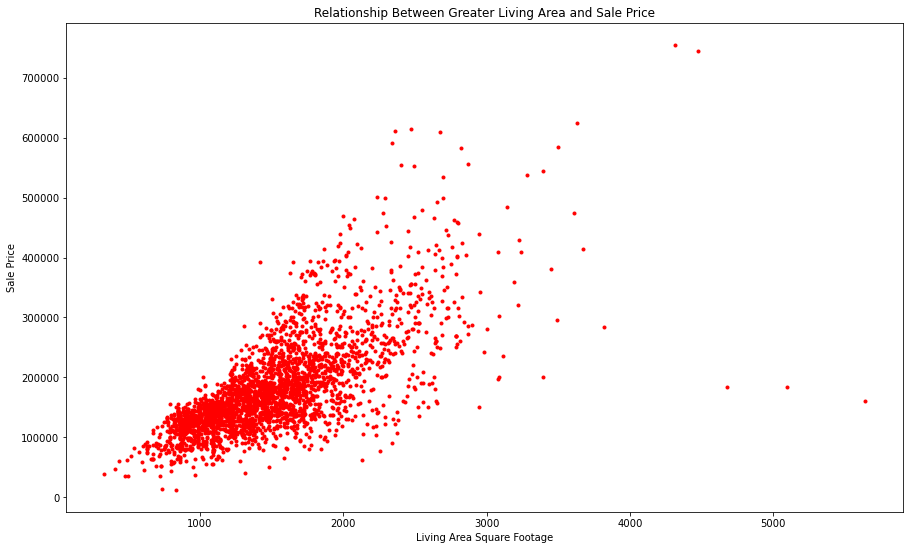

In [44]:
fig, ax = plt.subplots(figsize=(15,9))
plt.scatter(amesH_data['Gr Liv Area'],amesH_data['SalePrice'], c='red', marker='.')
plt.title('Relationship Between Greater Living Area and Sale Price')
plt.xlabel('Living Area Square Footage')
plt.ylabel('Sale Price')
plt.show()

There are, however, some extreme outliers - specifically 3 houses with square footage over 4500.

In [45]:
amesH_data[(amesH_data['Gr Liv Area'] > 4500)]

MS SubClass MS Zoning  Lot Frontage  Lot Area  Street  Alley  Lot Shape  \
1498       MSC60        RL       313.000     63887       2      0          1   
2180       MSC20        RL       128.000     39290       2      0          3   
2181       MSC60        RL       130.000     40094       2      0          3   

     Land Contour  Utilities Lot Config  Land Slope Neighborhood Condition 1  \
1498          Bnk          4     Corner           3      Edwards       Feedr   
2180          Bnk          4     Inside           3      Edwards        Norm   
2181          Bnk          4     Inside           3      Edwards        PosN   

     Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
1498        Norm      1Fam      2Story            10             5   
2180        Norm      1Fam      1Story            10             5   
2181        PosN      1Fam      2Story            10             5   

      Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st  \
1498        2008            2008        Hip   ClyTile       Stucco   
2180        2008            2009        Hip   CompShg      CemntBd   
2181        2007            2008        Hip   CompShg      CemntBd   

     Exterior 2nd Mas Vnr Type  Mas Vnr Area  Exter Qual  Exter Cond  \
1498       Stucco        Stone       796.000           5           3   
2180      CmentBd        Stone      1224.000           5           3   
2181      CmentBd        Stone       762.000           5           3   

     Foundation  Bsmt Qual  Bsmt Cond Bsmt Exposure  BsmtFin Type 1  \
1498      PConc          5          3             3               6   
2180      PConc          5          3             3               6   
2181      PConc          5          3             3               6   

      BsmtFin SF 1  BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  \
1498      5644.000               1         0.000      466.000       6110.000   
2180      4010.000               1         0.000     1085.000       5095.000   
2181      2260.000               1         0.000      878.000       3138.000   

     Heating  Heating QC Central Air  Electrical  1st Flr SF  2nd Flr SF  \
1498    GasA           5           Y           4        4692         950   
2180    GasA           5           Y           4        5095           0   
2181    GasA           5           Y           4        3138        1538   

      Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
1498                0         5642           2.000           0.000          2   
2180                0         5095           1.000           1.000          2   
2181                0         4676           1.000           0.000          3   

      Half Bath  Bedroom AbvGr  Kitchen AbvGr  Kitchen Qual  TotRms AbvGrd  \
1498          1              3              1             5             12   
2180          1              2              1             5             15   
2181          1              3              1             5             11   

      Functional  Fireplaces  Fireplace Qu Garage Type  Garage Yr Blt  \
1498           8           3             4      Attchd       2008.000   
2180           8           2             4      Attchd       2008.000   
2181           8           1             4     BuiltIn       2007.000   

      Garage Finish  Garage Cars  Garage Area  Garage Qual  Garage Cond  \
1498              3        2.000     1418.000            3            3   
2180              3        3.000     1154.000            3            3   
2181              3        3.000      884.000            3            3   

      Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
1498            2           214            292               0           0   
2180            2           546            484               0           0   
2181            2           208            406               0           0   

      Screen Porch  Pool Area  Pool QC  Fence Misc Featu

There is also a linear relationship between Lot Area and Sale Price.  

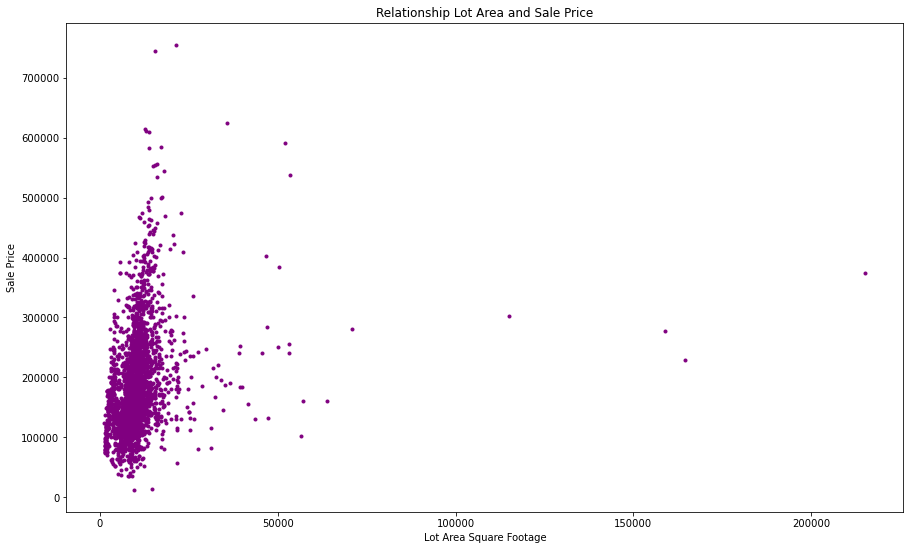

In [46]:
fig, ax = plt.subplots(figsize=(15,9))
plt.scatter(amesH_data['Lot Area'],amesH_data['SalePrice'], c='purple', marker='.')
plt.title('Relationship Lot Area and Sale Price')
plt.xlabel('Lot Area Square Footage')
plt.ylabel('Sale Price')
plt.show()

Again there are a number of outliers especially the 4 values greater than 100000

In [47]:
amesH_data[amesH_data['Lot Area']>100000]

MS SubClass MS Zoning  Lot Frontage  Lot Area  Street  Alley  Lot Shape  \
956        MSC20        RL       150.000    215245       2      0          1   
1570       SC190        RL        68.000    164660       1      0          3   
2071       MSC20        RL        68.000    115149       2      0          2   
2115       MSC50        RL        68.000    159000       2      0          2   

     Land Contour  Utilities Lot Config  Land Slope Neighborhood Condition 1  \
956           Low          4     Inside           1       Timber        Norm   
1570          HLS          4     Corner           1       Timber        Norm   
2071          Low          4    CulDSac           1      ClearCr        Norm   
2115          Low          4    CulDSac           1      ClearCr        Norm   

     Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
956         Norm      1Fam      1Story             7             5   
1570        Norm    2fmCon      1.5Fin             5             6   
2071        Norm      1Fam      1Story             7             5   
2115        Norm      1Fam      1.5Fin             6             7   

      Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st  \
956         1965            1965        Hip   CompShg      BrkFace   
1570        1965            1965      Gable   CompShg      Plywood   
2071        1971            2002      Gable   CompShg      Plywood   
2115        1958            2006      Gable   CompShg      Wd Sdng   

     Exterior 2nd Mas Vnr Type  Mas Vnr Area  Exter Qual  Exter Cond  \
956       BrkFace         None         0.000           3           3   
1570      Plywood         None         0.000           3           3   
2071      Plywood        Stone       351.000           3           3   
2115      HdBoard       BrkCmn       472.000           4           3   

     Foundation  Bsmt Qual  Bsmt Cond Bsmt Exposure  BsmtFin Type 1  \
956      CBlock          4          3             3               5   
1570     CBlock          3          3             3               5   
2071     CBlock          4          3             3               6   
2115     CBlock          4          3             3               3   

      BsmtFin SF 1  BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  \
956       1236.000               3       820.000       80.000       2136.000   
1570      1249.000               4       147.000      103.000       1499.000   
2071      1219.000               1         0.000      424.000       1643.000   
2115       697.000               1         0.000      747.000       1444.000   

     Heating  Heating QC Central Air  Electrical  1st Flr SF  2nd Flr SF  \
956     GasW           3           Y           4        2036           0   
1570    GasA           5           Y           4        1619         167   
2071    GasA           3           Y           4        1824           0   
2115    GasA           4           Y           4        1444         700   

      Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
956                 0         2036           2.000           0.000          2   
1570                0         1786           2.000           0.000          2   
2071                0         1824           1.000           0.000          2   
2115                0         2144           0.000           1.000          2   

      Half Bath  Bedroom AbvGr  Kitchen AbvGr  Kitchen Qual  TotRms AbvGrd  \
956           0              3              1             3              8   
1570          0              3              1             3              7   
2071          0              2              1             4              5   
2115          0              4              1             4              7   

      Functional  Fireplaces  Fireplace Qu Garage Type  Garage Yr Blt  \
956            8           2             4      Attchd       1965.000   
1570           8           2             4      Attchd     

There is a linear relationship for the most part between Total Basement Square Footage and Sale Price.  It does not appear to be quite as tight and there are a lot of 0 values.  However, there doesn't seem to be any extreme outliers.

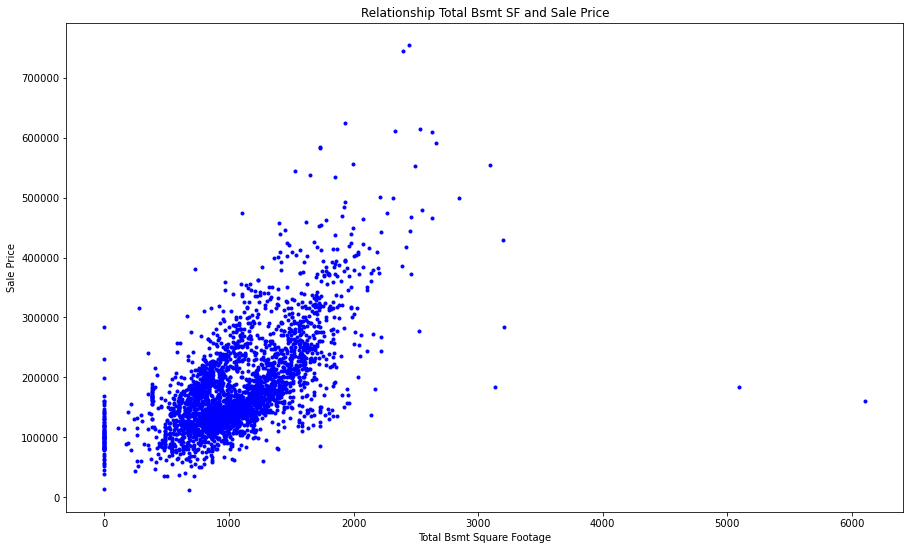

In [48]:
fig, ax = plt.subplots(figsize=(15,9))
plt.scatter(amesH_data['Total Bsmt SF'],amesH_data['SalePrice'], c='Blue', marker='.')
plt.title('Relationship Total Bsmt SF and Sale Price')
plt.xlabel('Total Bsmt Square Footage')
plt.ylabel('Sale Price')
plt.show()

This plot between Garage Area and Sale Price seems quite similar in shape to the scatter plot for Total Basement Square Footage and Sale Price.  It seems to be a fairly linear relationship with quite a few zero values and no extreme outliers.

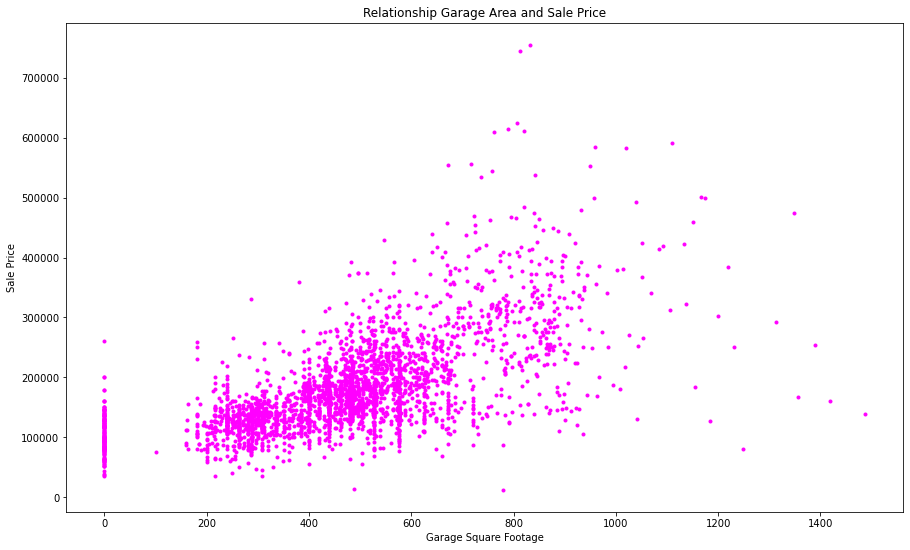

In [49]:
fig, ax = plt.subplots(figsize=(15,9))
plt.scatter(amesH_data['Garage Area'],amesH_data['SalePrice'], c='Magenta', marker='.')
plt.title('Relationship Garage Area and Sale Price')
plt.xlabel('Garage Square Footage')
plt.ylabel('Sale Price')
plt.show()

In the last of the scatter plots, I wanted to see what plot would result if AboveGrade Living Area and Total Basement Square Footage were combined.  The result is interesting as it shows a very strong linear relationship between Total Square Footage and Sale Price.

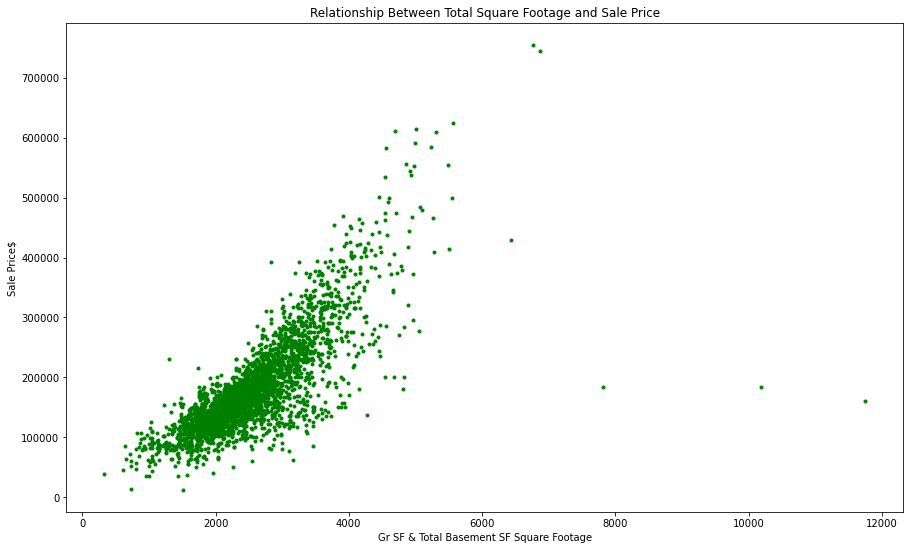

In [50]:
fig, ax = plt.subplots(figsize=(15,9))
plt.scatter((amesH_data['Gr Liv Area']+amesH_data['Total Bsmt SF']),amesH_data['SalePrice'], c='green', marker='.')
plt.title('Relationship Between Total Square Footage and Sale Price')
plt.xlabel('Gr SF & Total Basement SF Square Footage')
plt.ylabel('Sale Price$')
plt.show()

Removing Outliers
I remove the 3 outliers for Above Ground Living Area and 4 outliers for Lot Area.

In [51]:
amesH_data = amesH_data[amesH_data['Gr Liv Area'] < 4500]

In [52]:
amesH_data = amesH_data[amesH_data['Lot Area'] < 100000]

In [53]:
target = amesH_data['SalePrice']

Added Total Square Footage Feature
I combined Above Ground Living Area with Total Basement Square footage in a new feature - Total Indoor Square Footage.

In [54]:
amesH_data['Total SF'] = amesH_data['Gr Liv Area'] + amesH_data['Total Bsmt SF']

In [55]:
contFeat = contFeat + ['Total SF']

### Boxplots Showing Relationship Between Categorical Variables of Interest and Sale Price

#### House Style
First we take a look at the relationship between House Style and Sale Price.  We can see that it is possible to purchase nearly any style of home for a price in a band of about $140,000 to $200,000 in Ames.  The price band for one-story and two-story homes varies considerably starting under $50,0000 and going up to the mid-$300,000s.  Interestingly, while 2.5 Finished and 2.5 Unfinished price bands are higher than that for 2Story homes, 2Story homes have a significantly higher ceiling.  The remaining house styles have relatively tighter pricing bands.

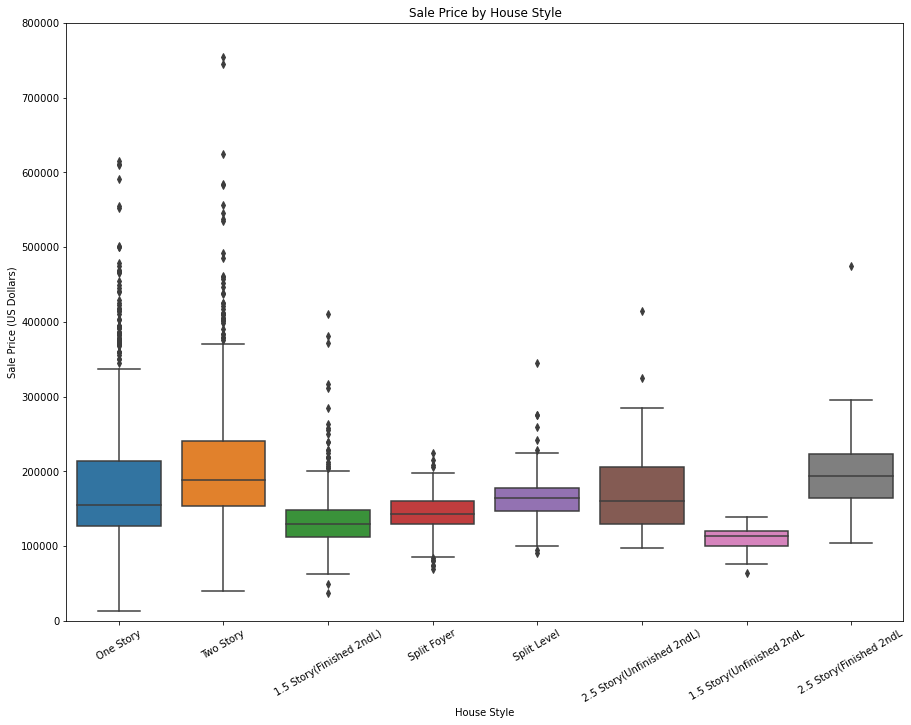

In [56]:
var = 'House Style'
data = pd.concat([amesH_data['SalePrice'], amesH_data[var]], axis =1)
f, ax = plt.subplots(figsize=(15, 11))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)
ax.set_title('Sale Price by House Style')
plt.ylabel('Sale Price (US Dollars)')
plt.xticks([0,1,2,3,4,5,6,7], ['One Story', 'Two Story', '1.5 Story(Finished 2ndL)', 'Split Foyer', 'Split Level', '2.5 Story(Unfinished 2ndL)', '1.5 Story(Unfinished 2ndL', '2.5 Story(Finished 2ndL'], rotation=30)
plt.show()

#### Neighborhood
Next we look at Neighborhood.  Immediately it is apparent that Stone Brook, Northridge Heights, and Northridge are the priciest neighborhoods with median home prices over $300,000.  Greenhills is only slightly cheaper.  Otherwise, homes can be purchased in most neighborhoods within our price band of $150,000 to $200,000.  Aside from the upper class areas, only the upper-middle class neighborhoods of Somerset,Timber,Veenker and College Crescent have median prices above the $200,000 mark.  Cheaper neighborhoods are Briardale, Meadow Village, Brookside, Old Town, Edwards, and South West of Iowa State University.  It makes sense that Iowa DOT and Railroad is the cheapest place to buy a house in Ames.

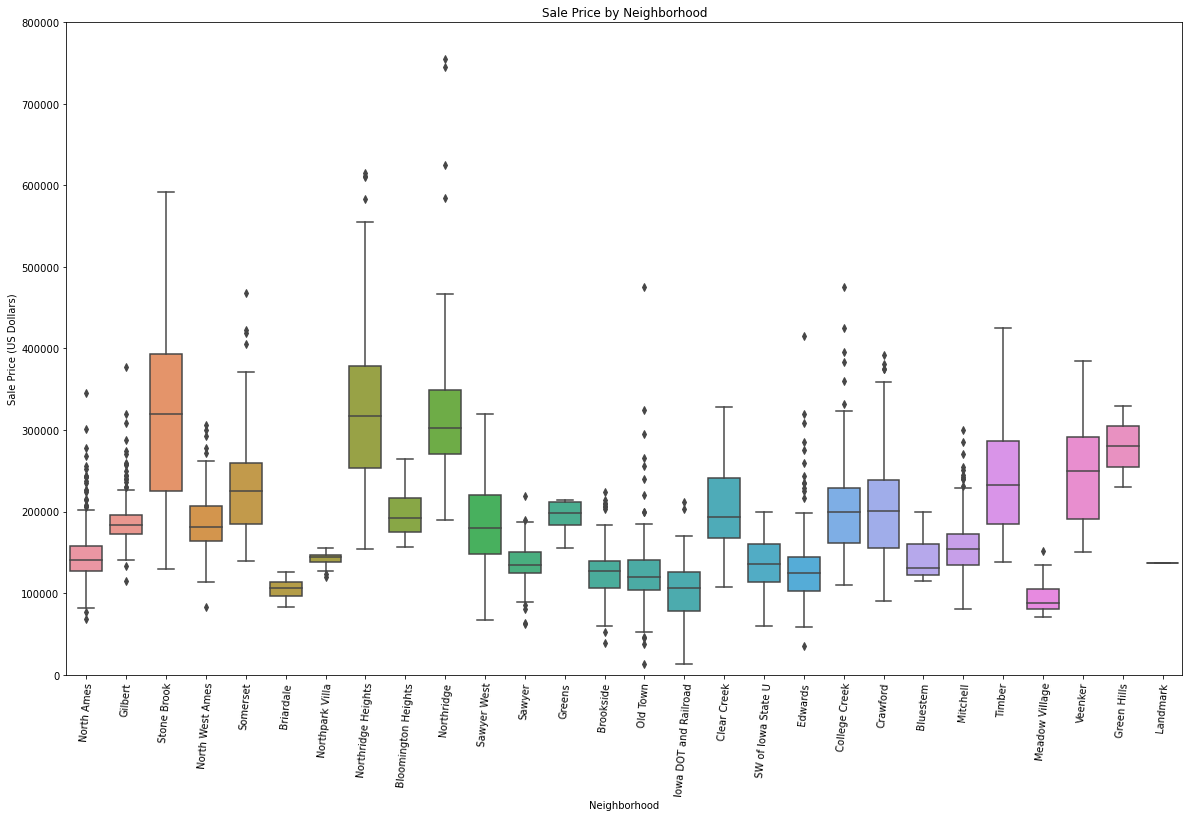

In [57]:
neighborhoods=['North Ames', 'Gilbert', 'Stone Brook', 'North West Ames', 'Somerset', 'Briardale', 'Northpark Villa', 'Northridge Heights', 'Bloomington Heights', 'Northridge', 'Sawyer West', 'Sawyer', 'Greens', 'Brookside', 'Old Town', 'Iowa DOT and Railroad','Clear Creek', 'SW of Iowa State U', 'Edwards', 'College Creek', 'Crawford', 'Bluestem', 'Mitchell', 'Timber', 'Meadow Village', 'Veenker', 'Green Hills', 'Landmark']
var = 'Neighborhood'
data = pd.concat([amesH_data['SalePrice'], amesH_data[var]], axis =1)
f, ax = plt.subplots(figsize=(20, 12))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)
ax.set_title('Sale Price by Neighborhood')
plt.ylabel('Sale Price (US Dollars)')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27], neighborhoods, rotation=85)
plt.show()

#### Zoning
We can see that while homes in Residential Low-Density have a wider price-band, they generally tend to have higher prices than Residential High-Density and Residential Medium-Density.  The Floating Village zoning has the highest prices. (Note: Floating Village here refers to a type of planned community with various amenities built-in to the neighborhood)

Not surprisingly, homes that are in Commercial, Industrial or Agricultural zones tend to be cheaper.

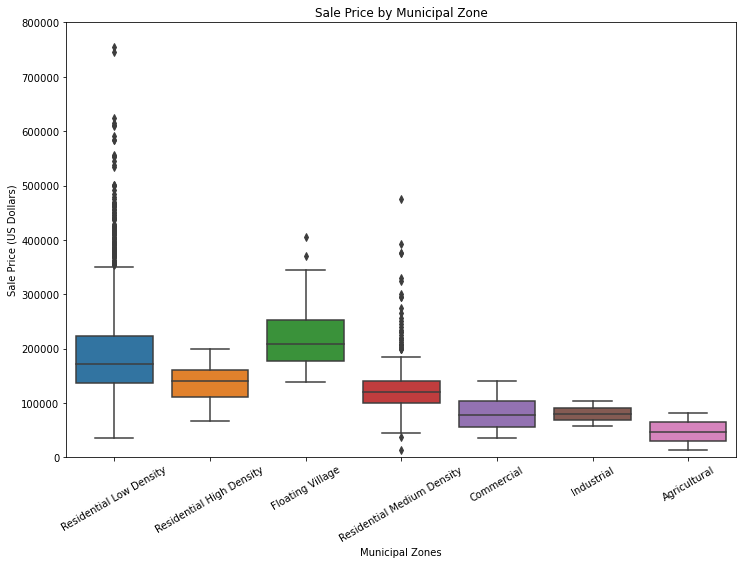

In [58]:
var = 'MS Zoning'
data = pd.concat([amesH_data['SalePrice'], amesH_data[var]], axis =1)
f, ax = plt.subplots(figsize=(12,8))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)
ax.set_title('Sale Price by Municipal Zone')
plt.xlabel('Municipal Zones')
plt.ylabel('Sale Price (US Dollars)')
plt.xticks(ticks=[0,1,2,3,4,5,6], labels=['Residential Low Density','Residential High Density', 'Floating Village', 'Residential Medium Density', 'Commercial', 'Industrial', 'Agricultural'], rotation=30)
plt.show()

### Looking at A Few Time Related Features

Here we can see the majority of homes sold in Ames between 2006 and 2010 were built since the 1960s with a considerable number built around the turn of the millennium.

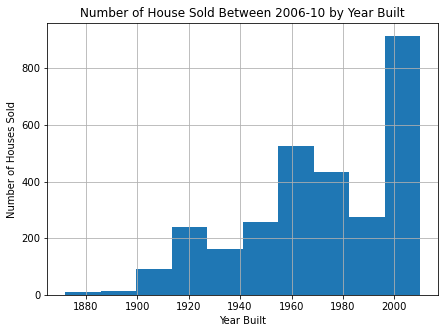

In [59]:
ax = amesH_data.hist(column='Year Built', figsize=(7,5))

ax = ax[0]
for x in ax:
    x.set_title('Number of House Sold Between 2006-10 by Year Built')
    x.set_xlabel('Year Built')
    x.set_ylabel('Number of Houses Sold')



This set of boxplots gives us a bit more detail in terms of the price of a home depending on year built.  As is perhaps obvious, newer homes tend to be more expensive.  It is interesting though that houses built in 1892 seem to fetch higher prices than we might expect.

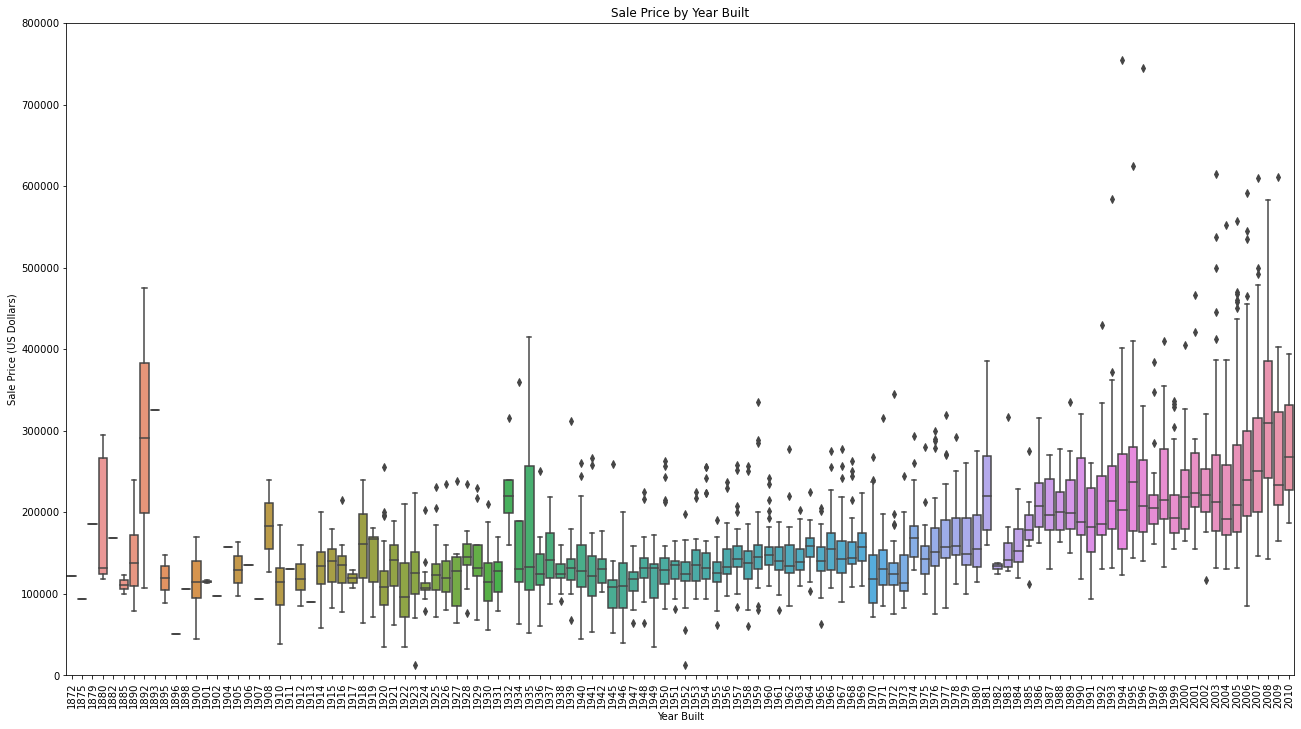

In [60]:
var = 'Year Built'
data = pd.concat([amesH_data['SalePrice'], amesH_data[var]], axis =1)
f, ax = plt.subplots(figsize=(22, 12))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)
ax.set_title('Sale Price by Year Built')
plt.ylabel('Sale Price (US Dollars)')
plt.xticks(rotation=90)
plt.show()

In this chart we can see that house prices actually tend to decline in Ames in the 2006-2010 period with a fall in prices since 2007 which corresponds to the beginning of the US Housing Finance Crisis.  

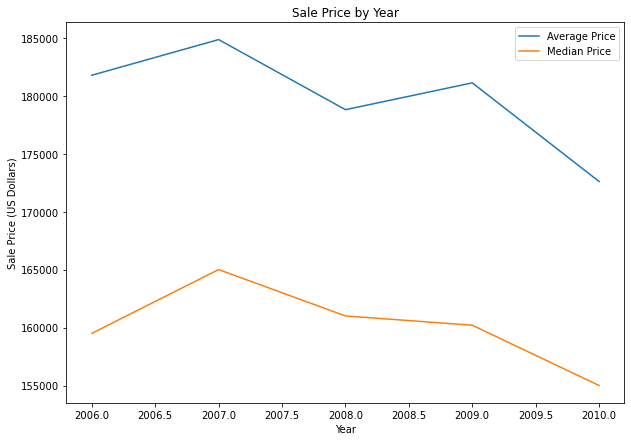

In [61]:
avg_price = amesH_data.groupby('Yr Sold')['SalePrice'].agg(np.average)
med_price = amesH_data.groupby('Yr Sold')['SalePrice'].agg(np.median)
f, ax = plt.subplots(figsize=(10,7))
plt.plot(avg_price, label='Average Price')
plt.plot(med_price, label='Median Price')
plt.legend(loc='upper right')
plt.title('Sale Price by Year')
plt.xlabel('Year')
plt.ylabel('Sale Price (US Dollars)')
plt.show()

This period is significantly different than the long-term housing price trend in Iowa.  As we can see in this graph provided by the Federal Reserve.

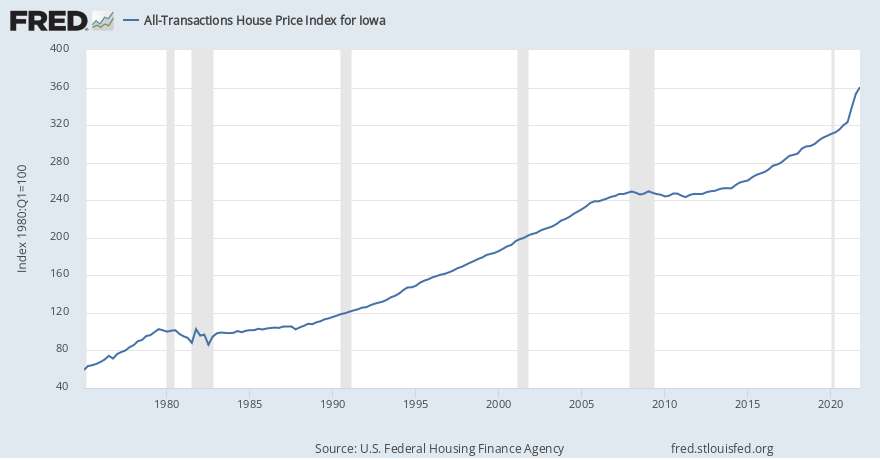

In [62]:
from IPython.display import Image
Image('images/fredgraphIowa.png')

### Frequency Distributions and Histograms

Looking at the frequency distribution of Sale Price we can see that our target variable has a significant right-skew.

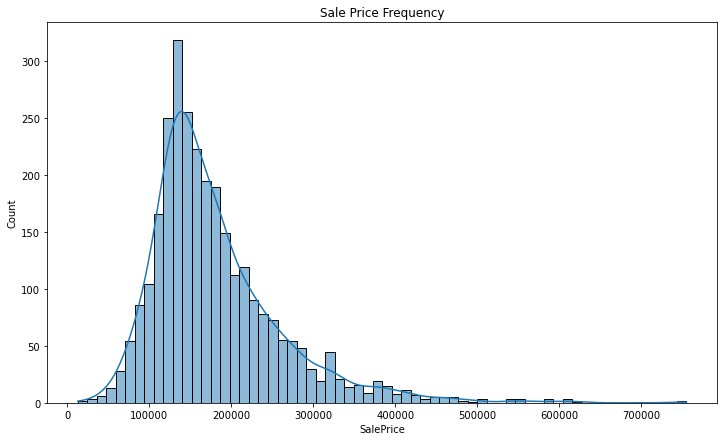

In [63]:
plt.figure(figsize=(12,7))
sns.histplot(data=amesH_data['SalePrice'], kde=True).set_title('Sale Price Frequency')
plt.show()


I attempted to perform a log transformation on both the target variable (Sale Price) and significantly skewed independent variables.  However, this resulted in both warnings and exceptions elsewhere in the code.  This might be because log(x) approaches negative infinity as the value of x becomes closer to zero.
(see http://onbiostatistics.blogspot.com/2012/05/logx1-data-transformation.html)

As an alternative, I utilized a log(x+1) transformation.
(see https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models)

This shifts the distribution to the right resulting in greater normality.

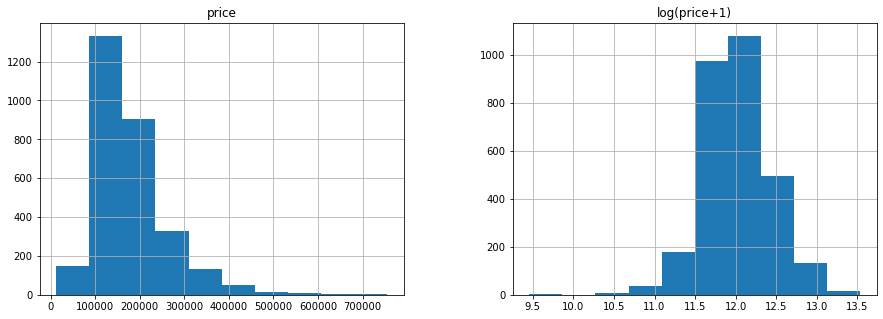

In [64]:
price = pd.DataFrame({'price':amesH_data['SalePrice'], 'log(price+1)':np.log1p(amesH_data['SalePrice'])})
price.hist(figsize=(15,5))
plt.show()

In [65]:
a_N = pd.concat([amesH_data[contFeat], amesH_data[discFeat], target], axis=1)
a_Ncorr = a_N.corr()

Looking at our histograms of discrete and continuous variables, we can see that most of the continuous features are right-skewed.  It would be good then to transform the most skewed of these variables using log(price+1) as we will do with our target variable.

There are a lot of discrete features (along with Mas Vnr Area) that are dominated by 0 values.  This makes sense as in most cases homes do not have a pool or an enclosed porch.  Nevertheless, it is probably doubtful that these zero dominated features will be important when developing our predictive models.

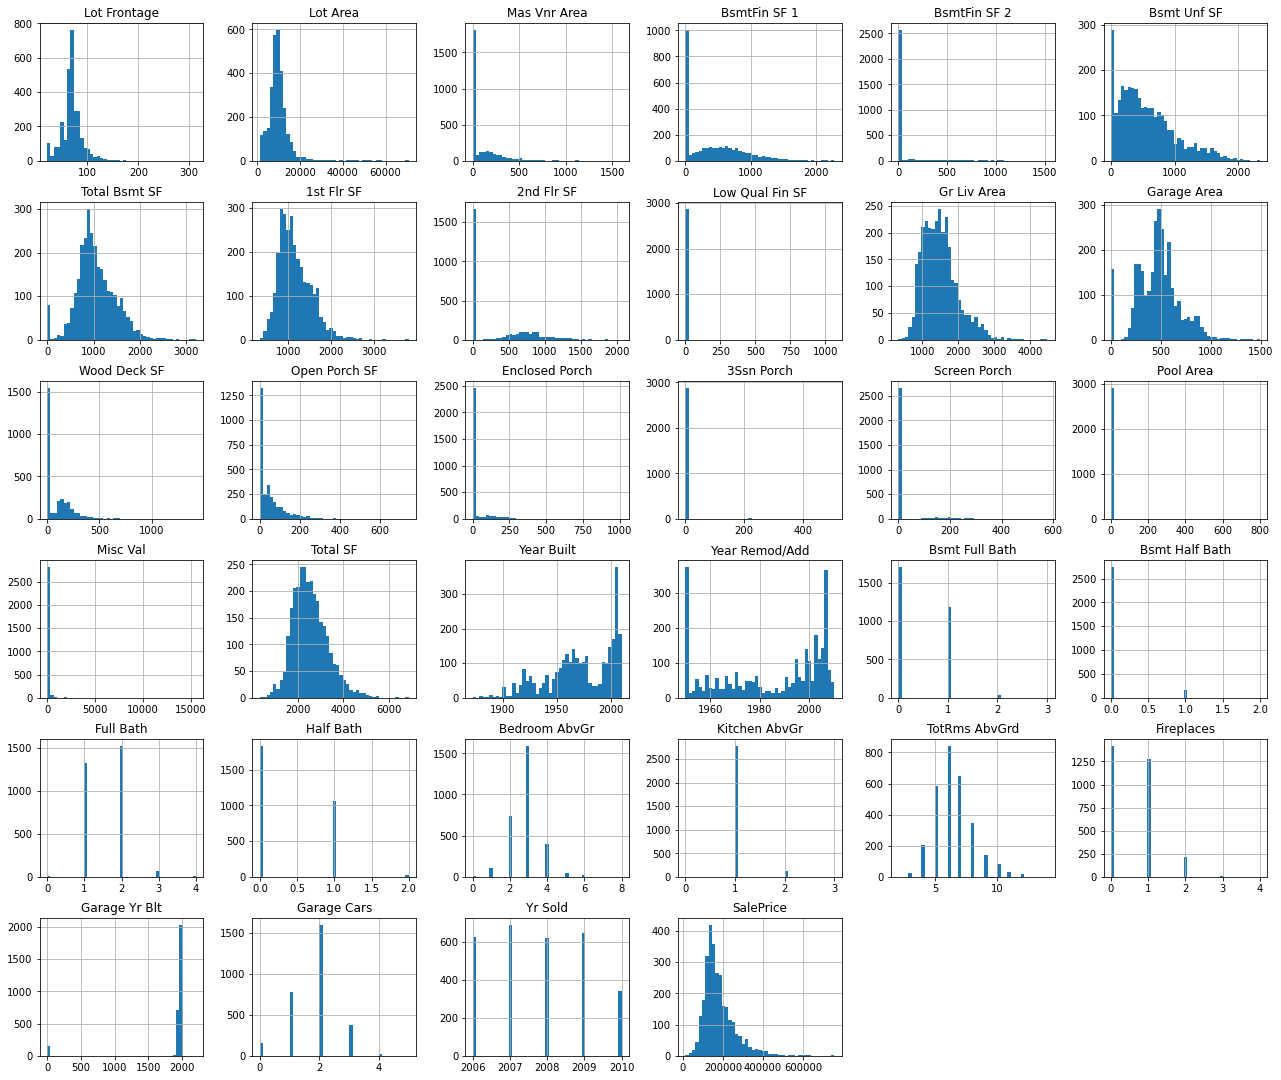

In [66]:

a_N.hist(bins=45, figsize=(22,19))

plt.show()

I thought I would check a couple of individual histograms to see if any more detail emerges if we zoom in.  We can see a bit more detail for these two features distributions but really the large number of zero values predominates.

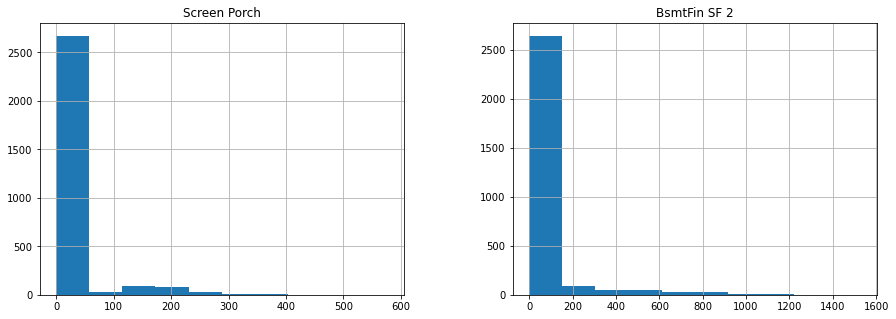

In [67]:
price = pd.DataFrame({'Screen Porch':amesH_data['Screen Porch'], 'BsmtFin SF 2':amesH_data['BsmtFin SF 2']})

price.hist(figsize=(15,5))
plt.show()


### Correlation Matrices

We begin by looking at an extremely large correlation matrix which includes all features in our data set.

While it is a bit chaotic, a few things stand out.  First, there are some features which have a high level of collinearity.  Most are fairly easy to understand:
Positive:
Pool Area & Pool Quality
Garage Quality & Garage Condition
Garage Area & Garage Cars
Year Built & Year Garage Built
Total Rooms Above Ground & Total Area Above Ground
Basement Finish Type Square Footage & Basement Type Square Footage

Negative:
Basement Unfinished Square Footage & Basement Full Bathrooms
Basement Unifinished Square Footage & Basement Finish Type Square footage
Year Built & Overall Condition


A bit more interesting is the close relationship between Total Basement Square Footage and First Floor Square Footage.

As well, there is a negative relationship between Enclosed Porch and Year Built.

In [68]:
amesCorr = amesH_data.corr()

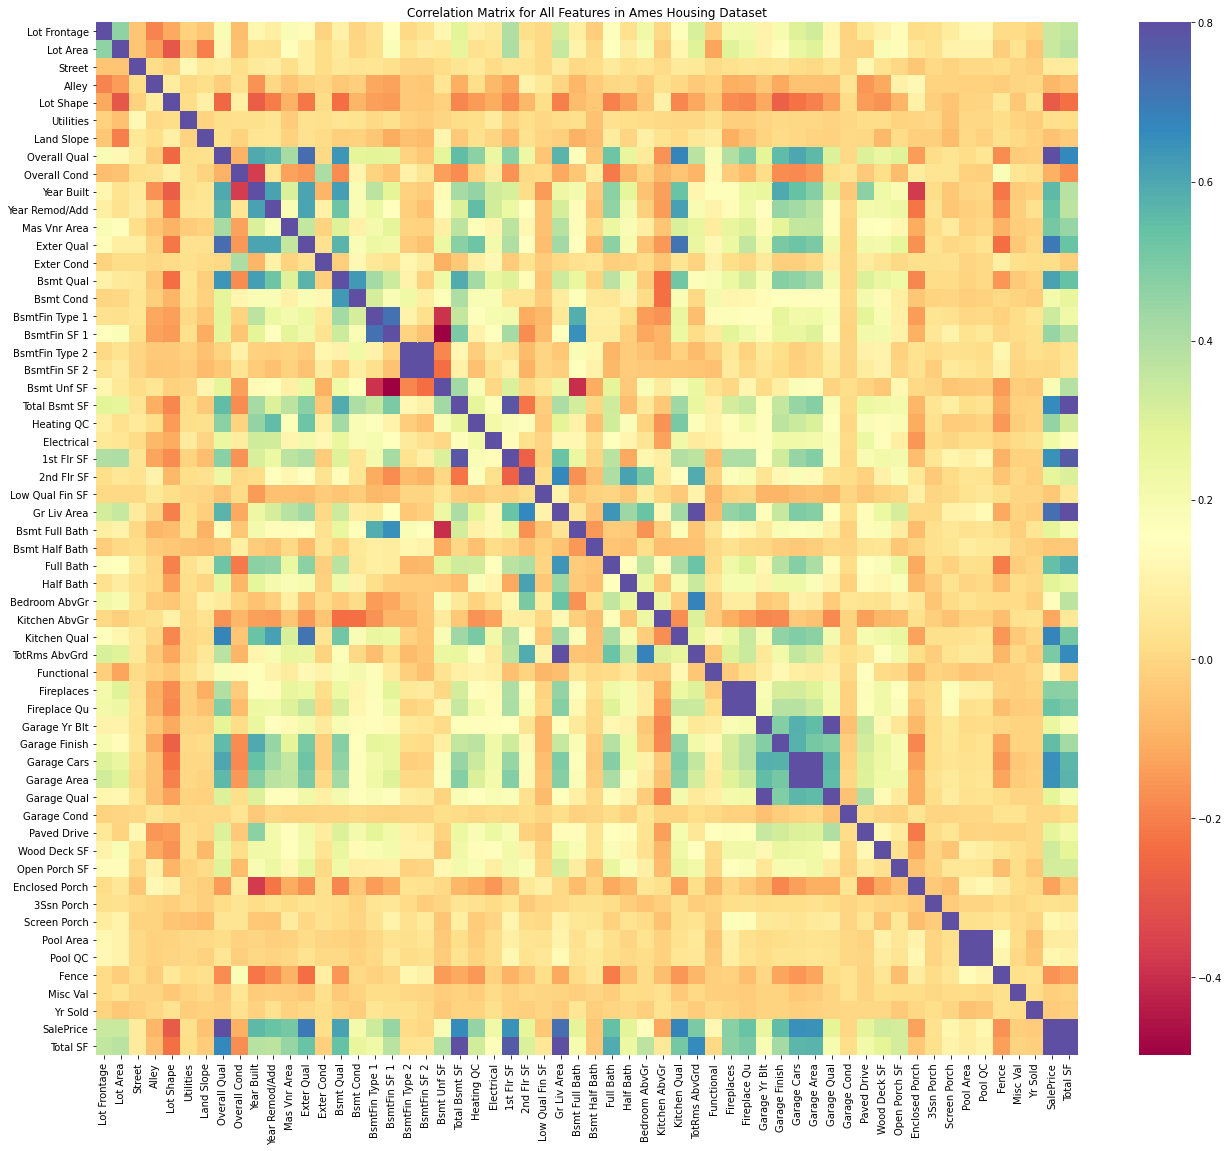

In [69]:
f, ax = plt.subplots(figsize=(22,19))
cmap = sns.color_palette('Spectral', as_cmap=True)
#cmap = sns.diverging_palette(145,300, l=65, center='dark',as_cmap = True)
ax.set_title('Correlation Matrix for All Features in Ames Housing Dataset')
sns.heatmap(amesCorr, vmax=0.8, cmap=cmap)
plt.show()

#### Matrix of 22 Features Most Correlated with Target 

Next we zoom in to look specifically at the 22 features with the highest level of correlation with our target variable - Sale Price.  

We see that there are very strong correlations between Total Indoor Square Footage, Overall Quality, and AboveGround Living Area Square Footage.



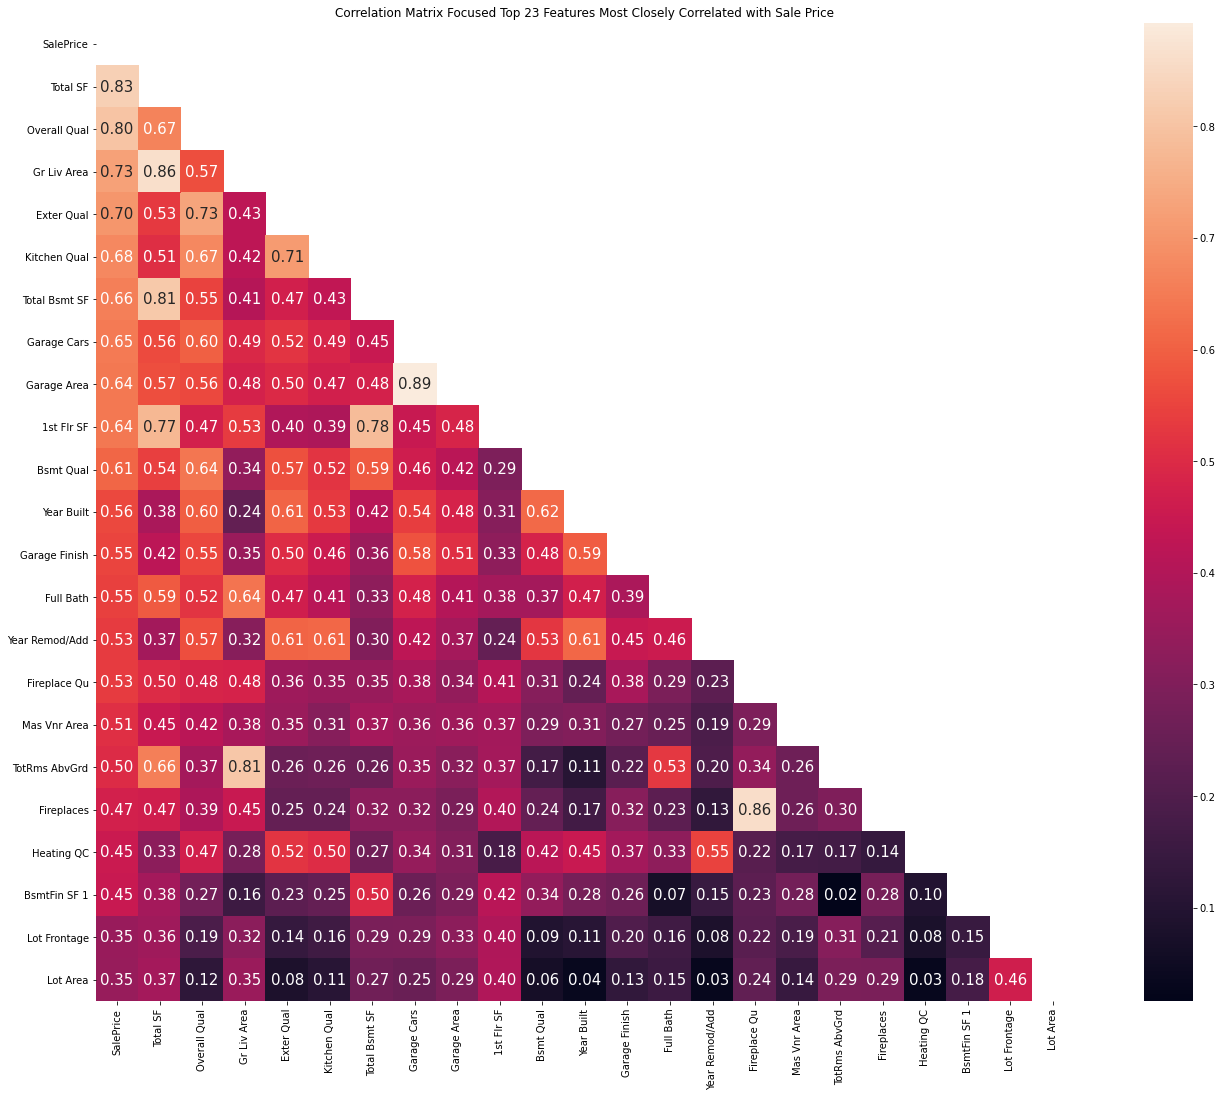

In [70]:
n = 23
top_corr = amesCorr.nlargest(n, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(amesH_data[top_corr].values.T)
f, ax = plt.subplots(figsize=(25,18))
#sns.set(font_scale=1.25)
mask = np.zeros_like(cm)
mask[np.triu_indices_from(mask)] = True
hm = sns.heatmap(cm, cbar=True, annot=True , square=True, fmt='.2f', annot_kws={'size':15}, yticklabels=top_corr.values, xticklabels=top_corr.values, mask=mask)
ax.set_title('Correlation Matrix Focused Top 23 Features Most Closely Correlated with Sale Price')
plt.show()


### Numeric Feature Correlation Matrix

Here we can again see problems of multicollinearity.  
Particularly problematic are:
Positive
Garage Area and Garage Cars
Total Basement Square Footage and 1st Flr Square Footage
Total Rooms Above Ground and AboveGround Living Area

Negative
Basement Unfinished Square Footage and Basement Finished Square Footage
Basement Unfinshed Square Footage and Basement Full Bathrooms

We also see significant collinearity between Total Indoor Square Footage and AboveGround Living Area Square Footage, Total Basement Square Footage and 1st Floor Square Footage.





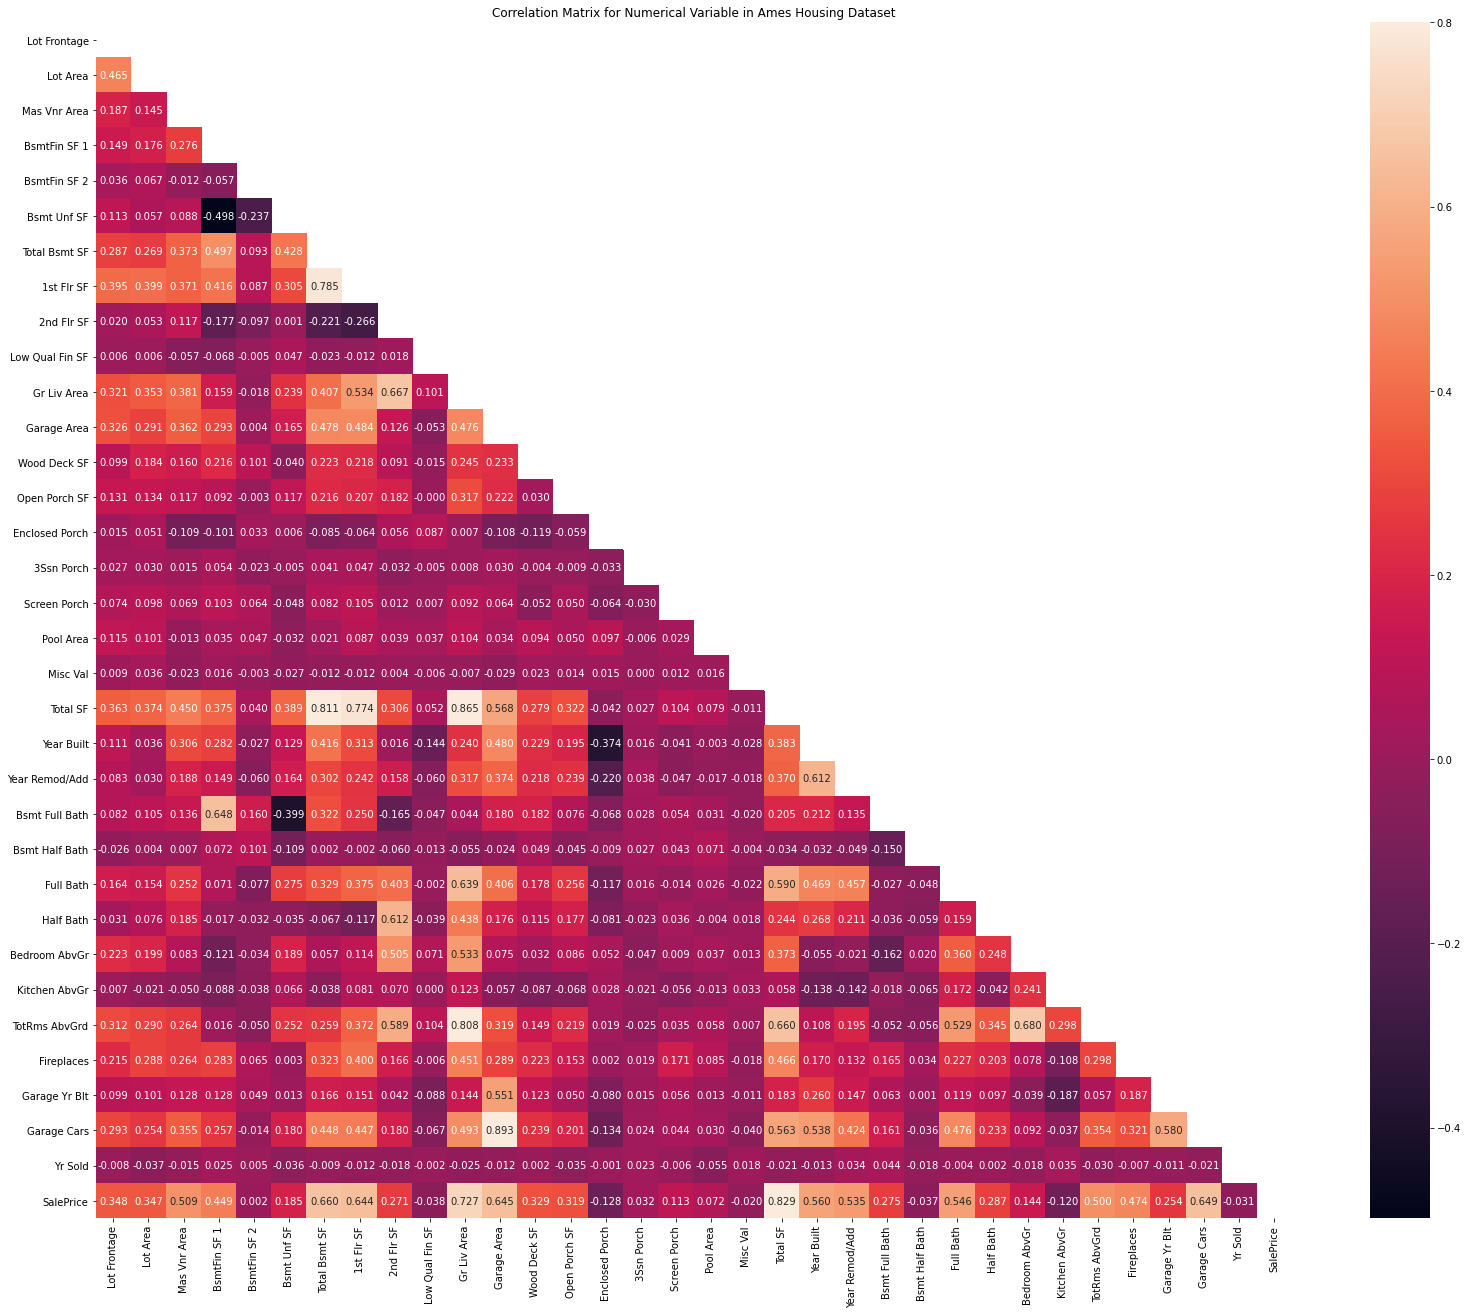

In [71]:
f, ax = plt.subplots(figsize=(28,22))
#mask = np.triu(np.ones_like(a_Ncorr,dtype=np.bool))
mask = np.zeros_like(a_Ncorr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(a_Ncorr, vmax=0.8, annot=True, mask=mask, square=True, fmt='.3f', annot_kws={'size':10})
ax.set_title('Correlation Matrix for Numerical Variable in Ames Housing Dataset')
plt.show()

### Categorical Feature Correlation Matrix Using Kendall Rank Method
Our correlation matrix using the Kendall Rank correlation for categorical features suggests that there is not a lot of monotonicity between categorical features.

The only variables that show a degree of monotonicity are Kitchen Quality with External Quality and Garage Condition with Garage Quality.

In [72]:
ames_C=pd.concat([amesH_data[ordF], amesH_data[nomF], amesH_data['SalePrice']], axis=1)
a_Ccorr = ames_C.corr(method='kendall')

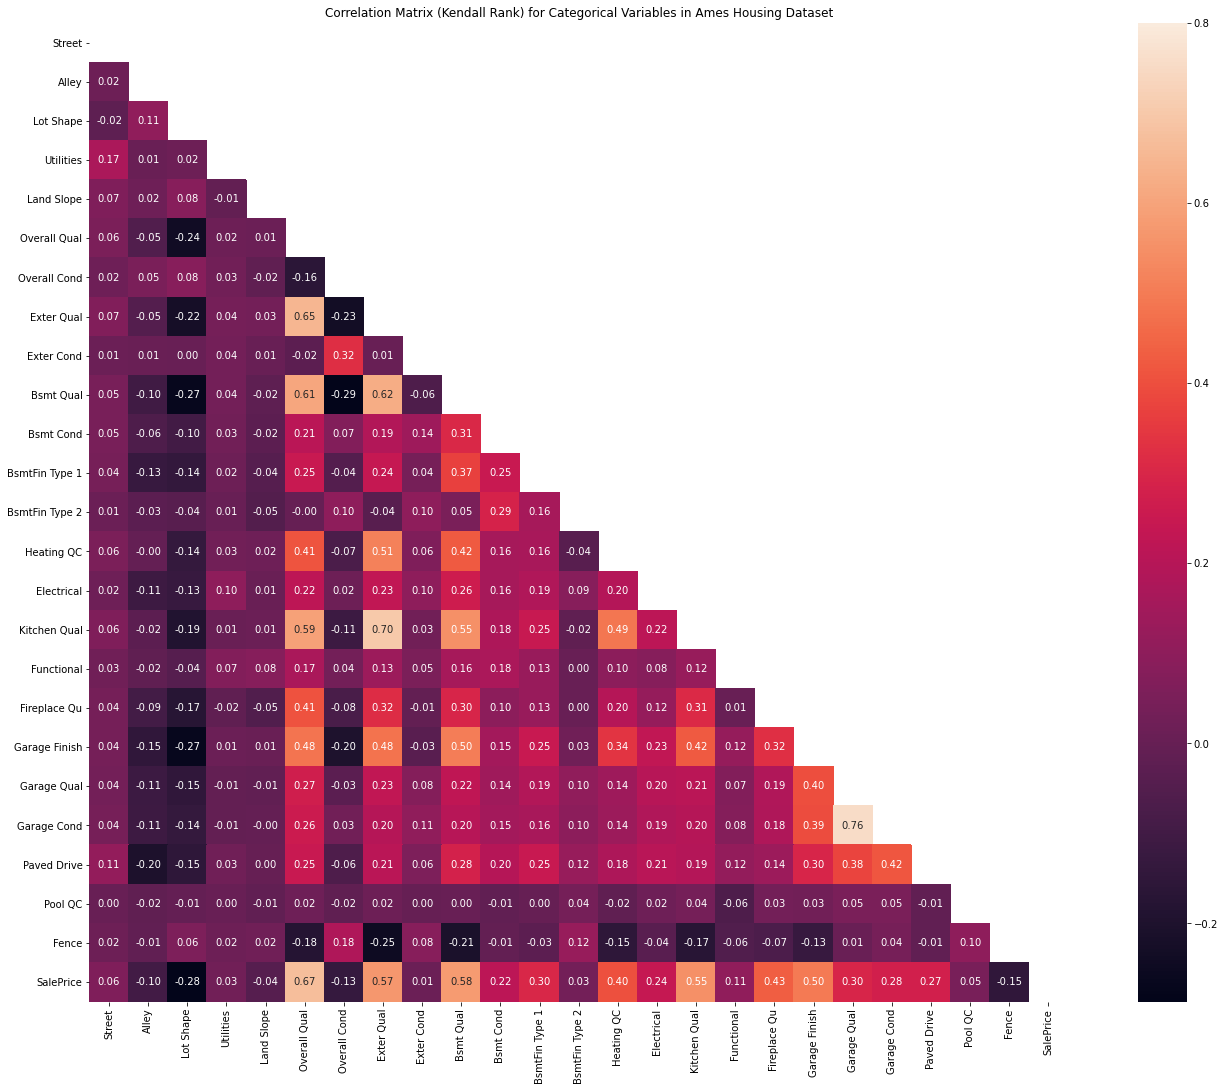

In [73]:
f, ax = plt.subplots(figsize=(25,18))
mask = np.zeros_like(a_Ccorr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(a_Ccorr, vmax=0.8, square=True, annot=True, mask=mask, fmt='.2f')
ax.set_title('Correlation Matrix (Kendall Rank) for Categorical Variables in Ames Housing Dataset')
plt.show()


#### Selecting Basic Features
Based on the correlation matrices above I have selected 16 variables for a preliminary multiple linear regression model.  I took the best correlated variables

Basic Features:
1. Overall Quality
1. AboveGrade Living Area Square Footage
1. External Quality
1. Total Basement Area Square Footage
1. Garage Area
1. Basement Quality
1. Year Built
1. Garage Finish
1. Full Bathrooms
1. Year Remodel/Addition
1. Fireplace Quality
1. Masonry Veneer Area
1. Heating Quality
1. Basement Finish 1 Square Footage
1. Lot Frontage
1. Lot Area

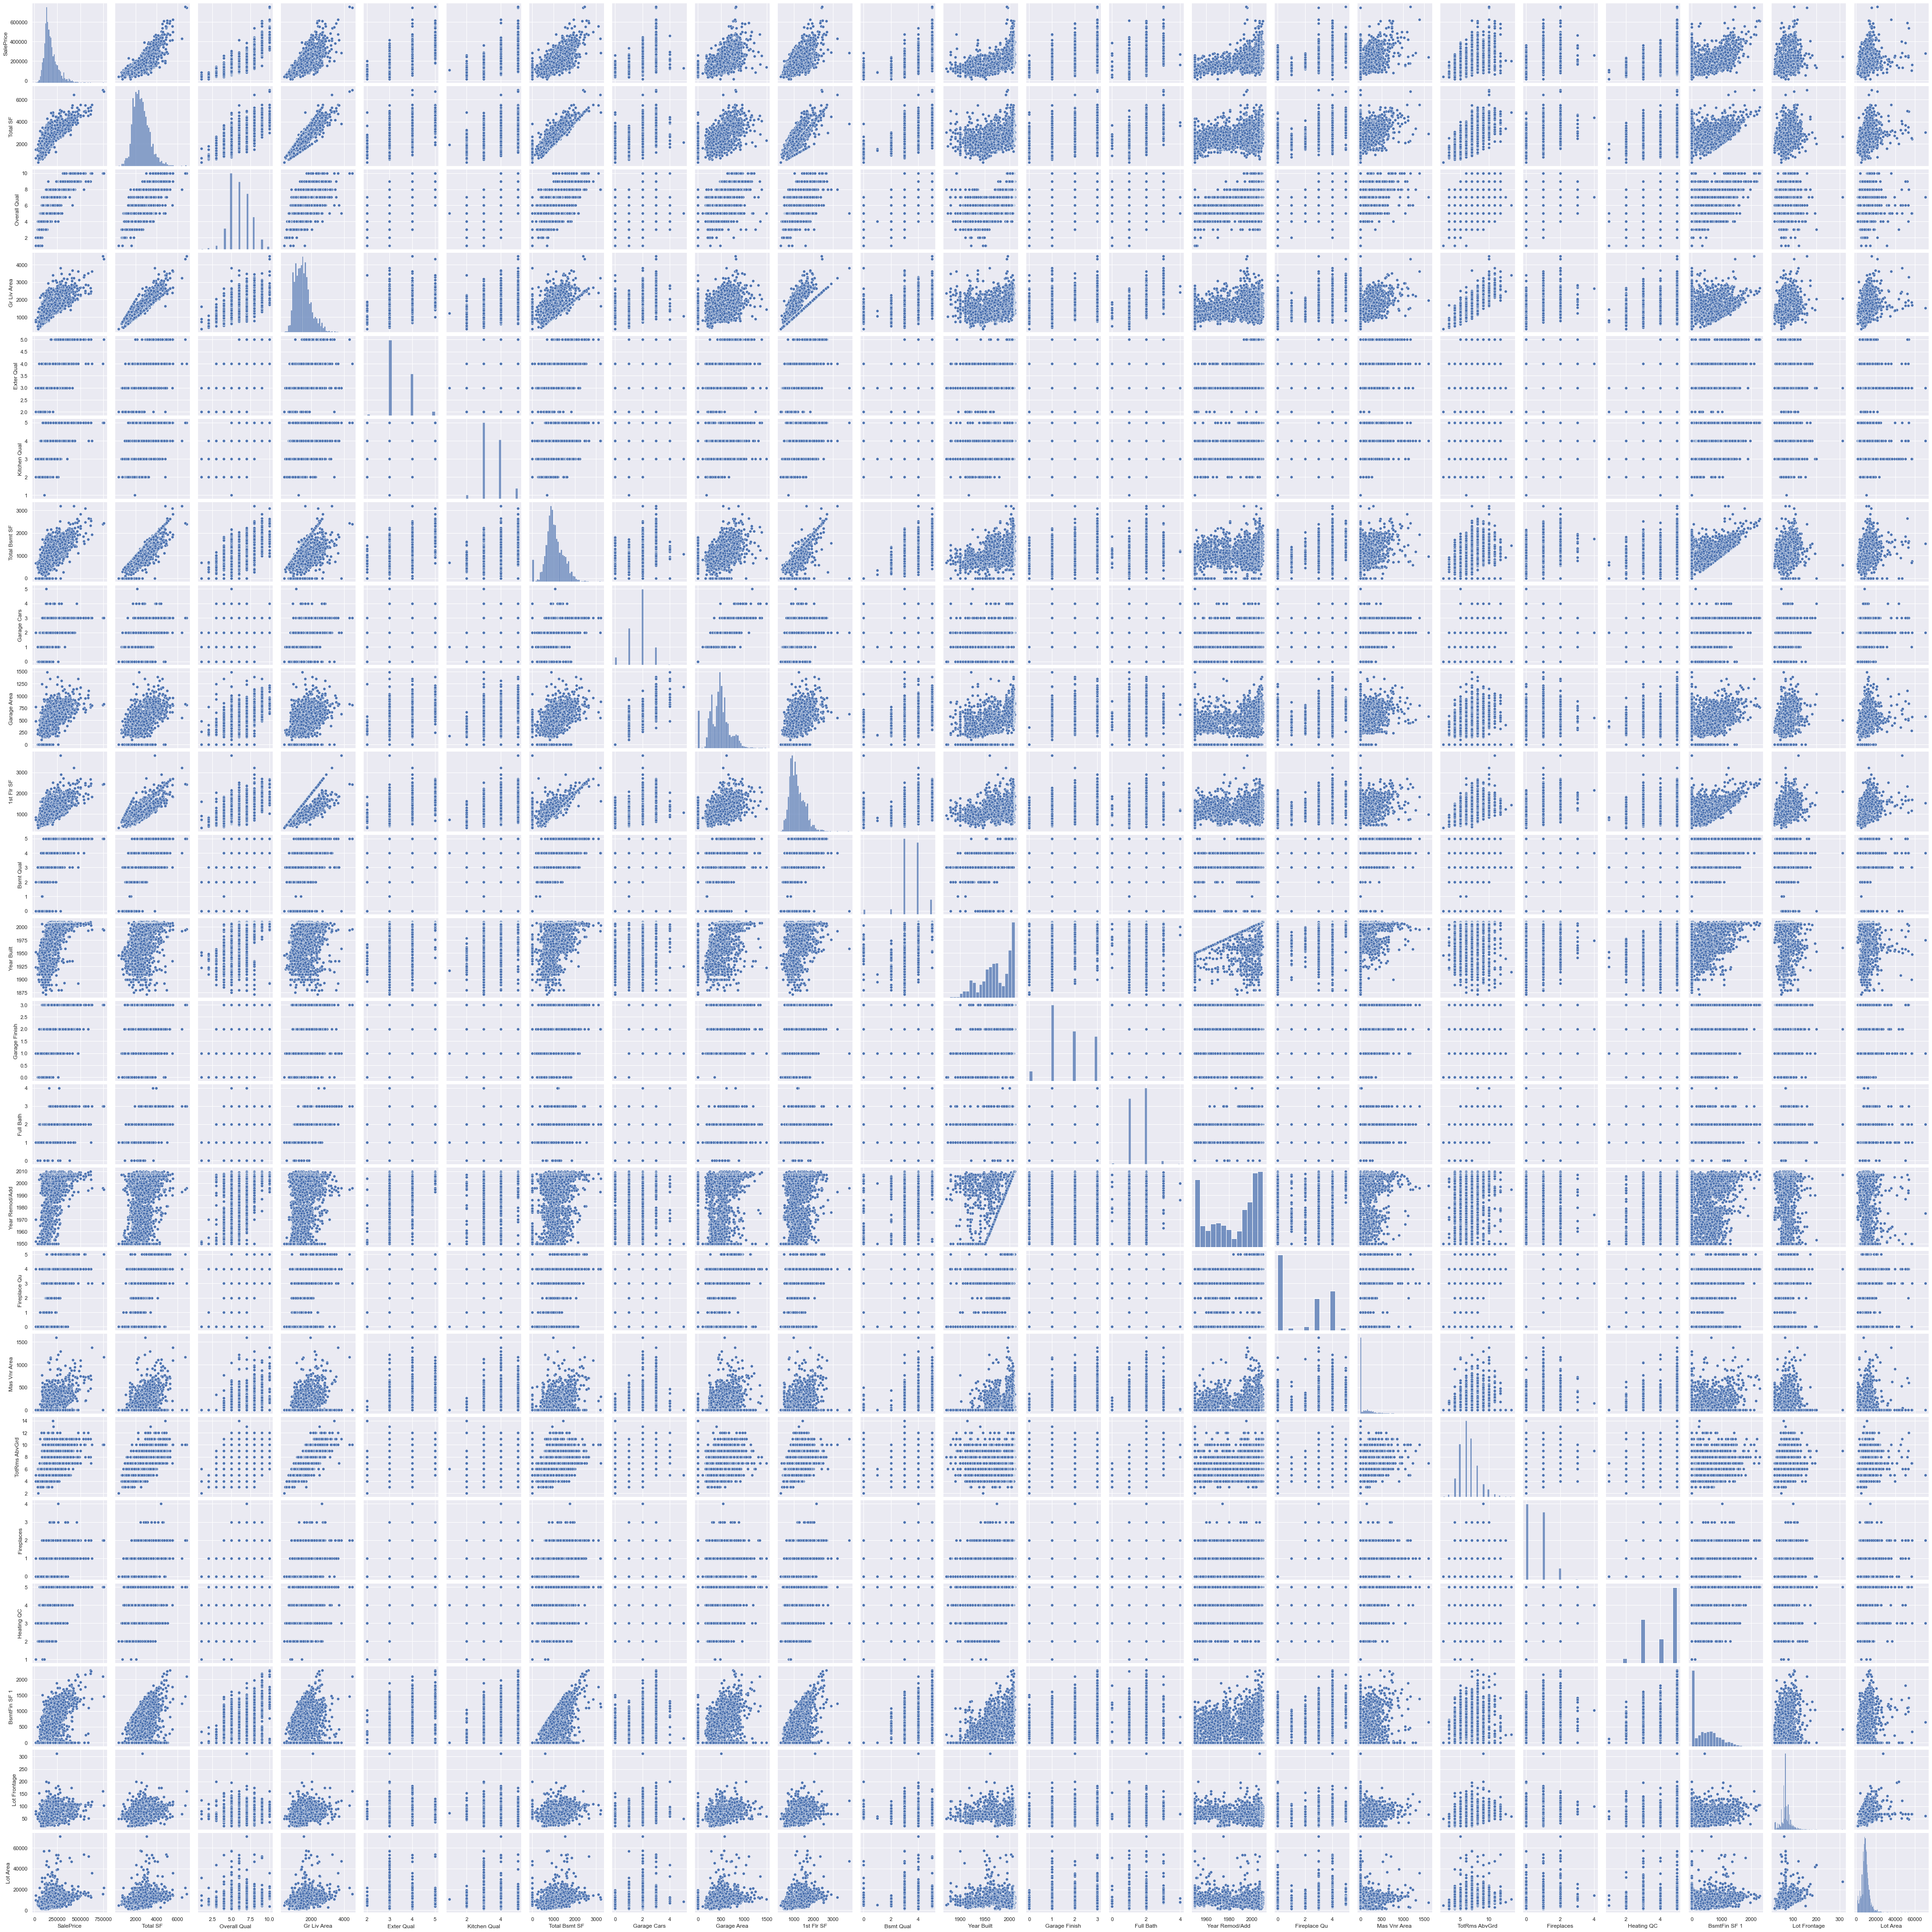

In [74]:
sns.set()
sns.pairplot(amesH_data[top_corr], height=2.5)
plt.show()

In [75]:
basicFeatures = ['Overall Qual', 'Gr Liv Area', 'Exter Qual', 'Total Bsmt SF', 'Garage Area', 'Bsmt Qual', 'Year Built', 'Garage Finish', 'Full Bath', 'Year Remod/Add', 'Fireplace Qu', 'Mas Vnr Area', 'Heating QC', 'BsmtFin SF 1', 'Lot Frontage', 'Lot Area']

## 3. Data Preparation II

I separate our dataset into object and nonObject features.  Quick check to make sure there are no Na values.  I then one-hot encode the object features using .getdummies.

Next I take a brief look at some of the most skewed features among the nonObject features before performing log(price+1) transformation for features with greater than 0.6 abs skew value.

Finally, I perform a log(price+1) transformation on the target variable.

In [76]:
obj_feat = amesH_data.select_dtypes(include=['object']).columns
nonObj_feat = amesH_data.select_dtypes(exclude = ['object']).columns
nonObj_feat = nonObj_feat.drop('SalePrice')

In [77]:
amesH_data_nonObjF = amesH_data[nonObj_feat]
amesH_data_objF = amesH_data[obj_feat]

In [78]:
len(amesH_data_nonObjF)

2923

In [79]:
len(amesH_data_objF)

2923

In [80]:
print(amesH_data_objF.isnull().values.sum())
print(amesH_data_nonObjF.isnull().values.sum())

0
0


In [81]:
amesH_data_objF=pd.get_dummies(amesH_data_objF)

In [82]:
skewness = amesH_data_nonObjF.apply(lambda x:skew(x))
skewness = skewness[abs(skewness) > 0.6]

In [83]:
print(skewness.sort_values().head(10))
print(skewness.sort_values().tail(20))

Utilities       -36.746
Street          -16.209
Functional       -5.165
Land Slope       -4.964
Electrical       -4.197
Garage Yr Blt    -3.909
Bsmt Cond        -3.512
Garage Qual      -3.267
Paved Drive      -2.982
Bsmt Qual        -1.270
dtype: float64
Lot Frontage       1.244
Exter Cond         1.318
Fence              1.754
Wood Deck SF       1.837
Open Porch SF      2.494
Mas Vnr Area       2.608
BsmtFin Type 2     3.149
Lot Area           3.582
Screen Porch       3.950
Bsmt Half Bath     3.964
Enclosed Porch     4.007
Alley              4.142
BsmtFin SF 2       4.151
Kitchen AbvGr      4.306
3Ssn Porch        11.384
Low Qual Fin SF   12.097
Pool QC           17.144
Pool Area         17.707
Misc Val          22.240
Garage Cond       54.004
dtype: float64


In [84]:
skewed_feat = skewness.index
amesH_data_nonObjF = amesH_data_nonObjF.copy()
amesH_data_nonObjF[skewed_feat] = np.log1p(amesH_data_nonObjF[skewed_feat])

In [85]:
y = target
y = np.log1p(y)


#### Creating Test and Train Sets

We concatenate our object and nonObject features and then create train and test sets.

In [86]:
X = pd.concat([amesH_data_nonObjF, amesH_data_objF], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print('X_train: ' + str(X_train.shape))
print('X_test: ' + str(X_test.shape))
print('y_train: ' + str(y_train.shape))
print('y_test: ' + str(y_test.shape))


X_train: (2046, 257)
X_test: (877, 257)
y_train: (2046,)
y_test: (877,)


#### Standardization
Next we standardized our data to prevent large discrepencies in scale between various features causing distortions.

In [87]:
stdSc = StandardScaler()
X_train = X_train.copy()
X_test = X_test.copy()
X_train.loc[:, nonObj_feat] = stdSc.fit_transform(X_train.loc[:, nonObj_feat])
X_test.loc[:, nonObj_feat] = stdSc.transform(X_test.loc[:, nonObj_feat])

In [88]:
X_test.head()

Lot Frontage  Lot Area  Street  Alley  Lot Shape  Utilities  Land Slope  \
2667        -2.133    -0.803   0.054 -0.261      0.680      0.035       0.210   
22           0.100    -0.348   0.054 -0.261      0.680      0.035       0.210   
502          0.566     0.037   0.054 -0.261      0.680      0.035       0.210   
1838        -1.542    -1.816   0.054  4.773      0.680      0.035       0.210   
686         -0.289    -0.202   0.054 -0.261      0.680      0.035       0.210   

      Overall Qual  Overall Cond  Year Built  Year Remod/Add  Mas Vnr Area  \
2667        -0.757         1.278      -1.707          -1.641        -0.787   
22           0.653        -0.498       0.961           0.767        -0.787   
502          0.653        -0.498       0.797           0.574         1.377   
1838         0.653        -0.498       1.156           1.104        -0.787   
686         -0.052         1.278      -0.761           0.478        -0.787   

      Exter Qual  Exter Cond  Bsmt Qual  Bsmt Cond  BsmtFin Type 1  \
2667      -0.662      -0.179     -0.258      0.172          -1.216   
22         1.079      -0.179      0.504      0.172           1.157   
502        1.079      -0.179      0.504      0.172           1.157   
1838       1.079      -0.179      1.126      1.090           1.157   
686       -0.662      -0.179     -0.258      0.172          -0.742   

      BsmtFin SF 1  BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  \
2667        -1.447          -0.251        -0.371        0.443         -1.002   
22           0.677          -0.251        -0.371        0.018         -0.550   
502          0.820          -0.251        -0.371       -0.036          0.058   
1838         0.867          -0.251        -0.371        0.226          0.728   
686          0.175          -0.251        -0.371        0.537         -0.432   

      Heating QC  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  \
2667      -0.146      -1.917      -1.768       1.126           -0.121   
22         0.895       0.252      -0.934       1.224           -0.121   
502        0.895       0.252      -0.006       1.260           -0.121   
1838       0.895       0.252       0.659      -0.846           -0.121   
686       -1.187       0.252      -0.093      -0.846            8.599   

      Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  \
2667       -0.381          -0.860          -0.245      0.820     -0.751   
22          0.532           1.107          -0.245      0.820      1.289   
502         1.178           1.107          -0.245      0.820      1.289   
1838       -0.132           1.107          -0.245      0.820     -0.751   
686         0.180          -0.860          -0.245     -1.012     -0.751   

      Bedroom AbvGr  Kitchen AbvGr  Kitchen Qual  TotRms AbvGrd  Functional  \
2667         -1.039          4.611        -0.754          1.049       0.218   
22            0.186         -0.205         0.741          0.476       0.218   
502           0.186         -0.205         0.741          0.476       0.218   
1838         -1.039         -0.205         0.741         -0.923       0.218   
686           0.186         -0.205        -0.754         -0.174       0.218   

      Fireplaces  Fireplace Qu  Garage Yr Blt  Garage Finish  Garage Cars  \
2667      -0.976        -0.967         -4.175         -1.904       -2.328   
22        -0.976        -0.967          0.246          0.327        0.314   
502        0.775         0.696          0.245          1.443        0.314   
1838       0.775         1.250          0.248          0.327        0.314   
686       -0.976        -0.967          0.244         -0.788        0.314   

      Garage Area  Garage Qual  Garage Cond  Paved Drive  Wood Deck SF  \
2667       -2.217       -4.078       -3.756       -3.404        -0.962   
22          0.893        0.270        0.234        0.313        -0.962   
502         0.818        0.270        0.234        0.313         1.238   
1838       -0.031       

## 4. Feature Selection

In this section I try two different methods of feature selection using the sklearn feature.selection module's SelectFromModel.

### Random Forest Selector
By default the random forest regressor will identify features that produce significantly higher decreases in mean squared error than an average of all features.

##### Hyperparameter tuning
Through trial and error I found that progressively lowering max features (@each split), max depth of trees, and max samples (number of samples drawn from X to train each base estimator) works best. This resulted in progressively better RSME scores particularly on the training data(see final model below). However, when I pushed these values too low, suddenly the RSME for test shot up to 50,000.

In terms of number of trees, I found that 50,000 trees produced very slightly better results than 10,000 but taking about double the amount of time.  As such I went with the 10,000 trees.

Through all my trials the threshold for selection stayed pretty stable at 0.0038

In [89]:
rf_featSelect = SelectFromModel(RandomForestRegressor(n_estimators = 10000, max_features=5, random_state=0, max_depth=3, max_samples=6,n_jobs=-1))
rf_featSelect.fit(X_train, y_train)
select_feat = X_train.columns[(rf_featSelect.get_support())]
print('select_feat')
print('Threshold for selection: ', rf_featSelect.threshold_)
X_select = rf_featSelect.transform(X_train)
importances = rf_featSelect.estimator_.feature_importances_
sorted_indicies = np.argsort(importances)[::-1]
importantFeatureCount = X_select.shape[1]
X_train.columns[sorted_indicies][:X_select.shape[1]]

select_feat
Threshold for selection:  0.0038910505836575885


Index(['Total SF', 'Gr Liv Area', 'Garage Yr Blt', 'Total Bsmt SF',
       'Garage Area', 'Overall Qual', 'Year Built', '1st Flr SF',
       'Year Remod/Add', 'Lot Area', 'Lot Frontage', 'Bsmt Qual',
       'BsmtFin SF 1', 'Kitchen Qual', 'Garage Finish', 'Garage Cars',
       'TotRms AbvGrd', 'Open Porch SF', 'Exter Qual', 'Bsmt Unf SF',
       'Fireplace Qu', 'Wood Deck SF', 'BsmtFin Type 1', '2nd Flr SF',
       'Mas Vnr Area', 'Heating QC', 'Yr Sold', 'Full Bath', 'Fireplaces',
       'Foundation_PConc', 'Bedroom AbvGr', 'Garage Type_Attchd',
       'Overall Cond', 'Lot Shape', 'Exterior 1st_VinylSd',
       'Foundation_CBlock', 'Exterior 2nd_VinylSd', 'Mas Vnr Type_None',
       'Bsmt Exposure_No', 'Half Bath', 'Mas Vnr Type_BrkFace',
       'MS SubClass_MSC20', 'Garage Type_Detchd', 'House Style_1Story',
       'Bsmt Full Bath', 'MS SubClass_MSC60', 'Roof Style_Gable',
       'House Style_2Story', 'Lot Config_Inside', 'MS Zoning_RL',
       'Sale Condition_Normal', 'Roof Style_Hi

The number of selected features went up considerably with hyperparameter tuning - from 17 intially to 71.  As the number of features increased, the relative importance of most important features dropped from 0.4 & 3.7 for Overall Quality and Total Indoor Square footage to just below 0.025 (Overall Quality) and just over 0.025(Total Indoor Square Footage).

I think that by applying a more rigorous method of hyperparameter fine tuning it may be possible to further optimize this selector.

In [90]:
len(select_feat)

71

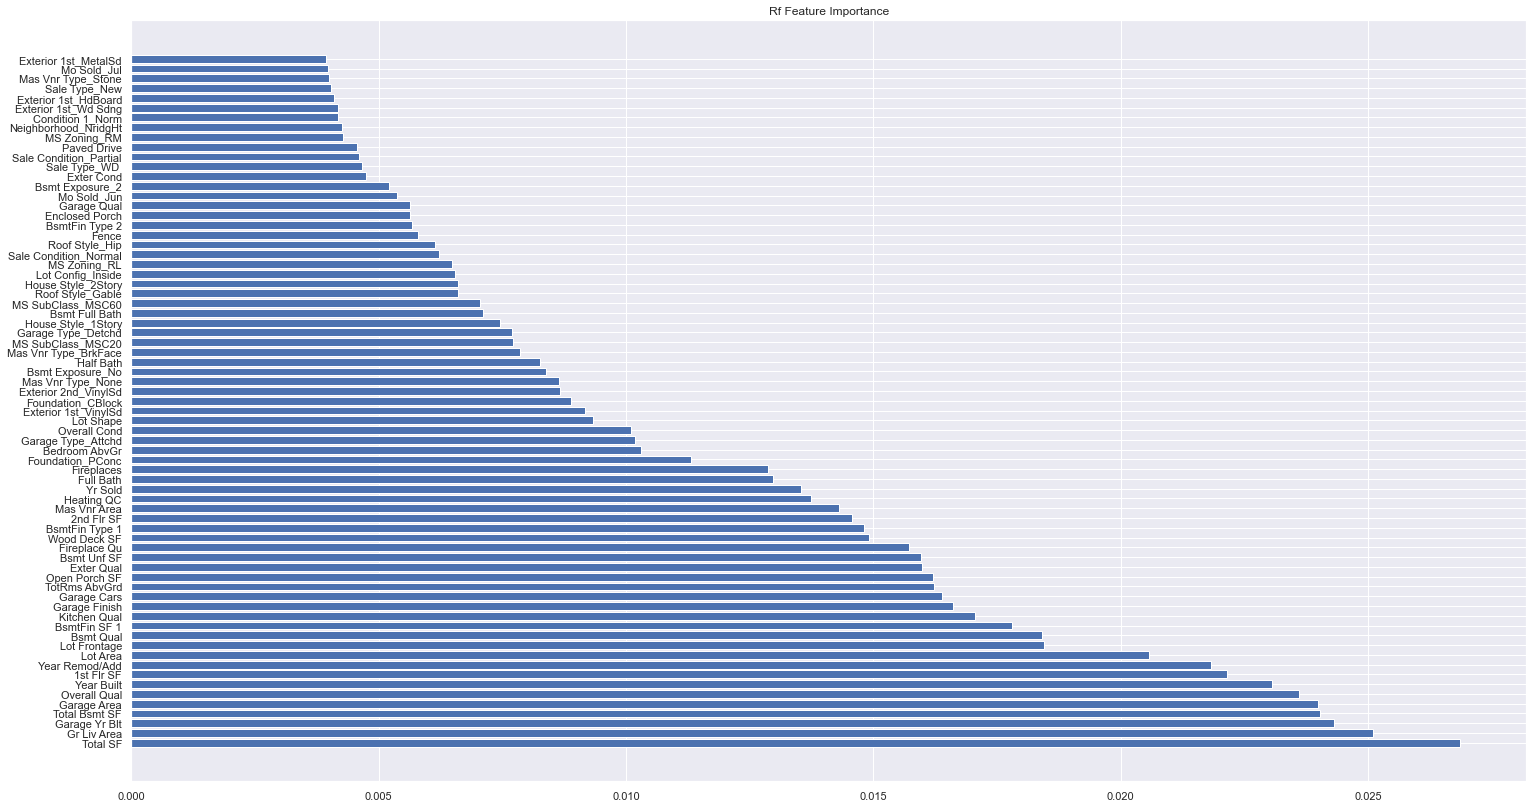

In [91]:
f, ax = plt.subplots(figsize=(25,14))
plt.title('Rf Feature Importance')
plt.barh(range(X_select.shape[1]), importances[sorted_indicies][:importantFeatureCount])
plt.yticks(range(X_select.shape[1]), X_train.columns[sorted_indicies][:importantFeatureCount])
plt.tight_layout

plt.show()

In [92]:
len(select_feat)

71

### Lasso Selector

For the LassoCV regressor, I set intial alpha values then test them to obtain optimal alpha scores.

In [93]:
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1], max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print('Best alpha: ', alpha)

Best alpha:  0.0006


In [94]:
lasso_A = LassoCV(alphas = [alpha*0.6, alpha * 0.65, alpha * 0.7, alpha * 0.75, alpha * 0.8, alpha * 0.9, alpha * 0.95, alpha * 1.05, alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], max_iter=50000, cv = 10)
#lasso_A.fit(X_train, y_train)
#print('Best alpha: ', alpha)

I then take my improved model and use it with SelectFromModel.  The key hyperparameter here is the threshold value which represents the cut off in terms of significant features.  At a high level such as 0.25, the lasso model returns zero features.  In order to tune the threshold parameter, I implemented a while loop that progressively lowered the value until 20 features were obtained.  Ultimately the threshold dropped to 0.0329999.

In [95]:
lassofeatSelect2 = SelectFromModel(lasso_A, threshold=0.25)
lassofeatSelect2.fit(X_train,y_train)
n_features = lassofeatSelect2.transform(X_train).shape[1]
while n_features < 20:
    lassofeatSelect2.threshold -=0.001
    X_transform = lassofeatSelect2.transform(X_train)
    n_features = X_transform.shape[1]
print('Number of features:', n_features, '\n threshold: ', lassofeatSelect2.threshold)


select_feat_lasso = X_train.columns[(lassofeatSelect2.get_support())]
select_feat_lasso

Number of features: 20 
 threshold:  0.03299999999999981


Index(['Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Total Bsmt SF', 'Gr Liv Area', 'MS Zoning_FV', 'Neighborhood_BrkSide',
       'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_Somerst', 'Condition 1_PosN', 'Exterior 1st_AsbShng',
       'Exterior 1st_BrkFace', 'Bsmt Exposure_3', 'Central Air_N',
       'Sale Type_New', 'Sale Condition_Abnorml', 'Sale Condition_Family'],
      dtype='object')

The contrast between the variables selected by the Random Forest selector and the Lasso selector is very interesting.  

The Random Forest selector tended to pick mainly numeric(nonObj) variables and the most important of these tend to be somewhat similar to what we might expect based on correlations with Sale Price.

While the Lasso Selector did choose variables such as AboveGround Living Area and Overall Quality, it also chose a large number of categorical(obj) variables.  Some of these were judged to be very important such as Neighborhood_Crawford, Exterior 1st_BrkFace, and Sale Condition Abnormal.  I found it particularly interesting that Neighborhoods assumed such an increased importance as this group of features had been ignored by the Random Forest Selector.  

I believe this points to the Random Forest selector favoring numeric variables with a high level of cardinality.

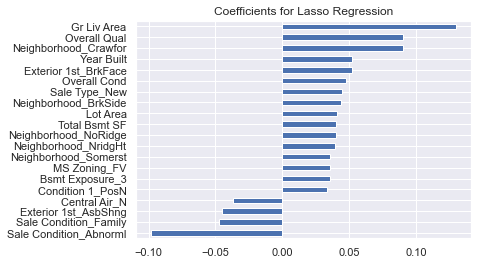

In [96]:
coeffs = pd.Series(lassofeatSelect2.estimator_.coef_, index=X_train.columns)

key_coeffs = pd.concat([coeffs.sort_values().head(4), coeffs.sort_values().tail(16)])
key_coeffs.plot(kind='barh')
plt.title('Coefficients for Lasso Regression')
plt.show()

In [97]:
scorer = make_scorer(mean_squared_error, greater_is_better=False)

def rmse_cv_train(model,X_train):
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv=10))
    return(rmse)

def rmse_cv_test(model, X_test):
    rmse = np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv=10))
    return(rmse)

In [98]:
X_train.head()

Lot Frontage  Lot Area  Street  Alley  Lot Shape  Utilities  Land Slope  \
2500         1.454     0.425   0.054 -0.261      0.680      0.035      -3.943   
261          0.405     0.355   0.054 -0.261      0.680      0.035       0.210   
1775         0.405     0.211   0.054 -0.261      0.680      0.035       0.210   
2590         1.819     1.745   0.054 -0.261      0.680      0.035       0.210   
1024         0.100     1.122   0.054 -0.261     -0.970      0.035       0.210   

      Overall Qual  Overall Cond  Year Built  Year Remod/Add  Mas Vnr Area  \
2500         1.357        -0.498       0.699           0.430         1.715   
261         -0.757         0.390       0.172          -0.389        -0.787   
1775         0.653         0.390       1.189           1.104        -0.787   
2590         0.653        -0.498      -0.996          -1.015        -0.787   
1024        -0.757         0.390       0.205          -0.341        -0.787   

      Exter Qual  Exter Cond  Bsmt Qual  Bsmt Cond  BsmtFin Type 1  \
2500       1.079      -0.179      1.126      0.172           1.157   
261       -0.662      -0.179     -0.258      1.090          -0.742   
1775       1.079      -0.179      0.504      0.172          -1.216   
2590       1.079      -0.179     -0.258      0.172          -1.216   
1024      -0.662      -0.179      0.504      0.172           0.682   

      BsmtFin SF 1  BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  \
2500         0.927          -0.251        -0.371       -0.122          0.685   
261          0.315           3.316         3.061       -2.997         -0.360   
1775        -1.447          -0.251        -0.371        0.863          0.768   
2590        -1.447          -0.251        -0.371        0.656         -0.277   
1024         0.800           1.066         2.003       -0.011          0.191   

      Heating QC  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  \
2500       0.895       0.252       1.027       1.352           -0.121   
261       -1.187       0.252      -0.640      -0.846           -0.121   
1775       0.895       0.252       0.698      -0.846           -0.121   
2590       0.895       0.252       1.949      -0.846           -0.121   
1024      -1.187       0.252       0.085      -0.846           -0.121   

      Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  \
2500        2.160           1.107          -0.245      0.820      1.289   
261        -1.418           1.107          -0.245     -1.012     -0.751   
1775       -0.093          -0.860          -0.245      0.820     -0.751   
2590        1.145           1.107          -0.245     -1.012      1.289   
1024       -0.701          -0.860           4.079      0.820     -0.751   

      Bedroom AbvGr  Kitchen AbvGr  Kitchen Qual  TotRms AbvGrd  Functional  \
2500          0.186         -0.205         0.741          1.561       0.218   
261           0.186         -0.205        -0.754         -0.923       0.218   
1775          0.186         -0.205         0.741         -0.923       0.218   
2590          0.186         -0.205        -0.754          0.476      -0.877   
1024          0.186         -0.205         2.236         -0.174       0.218   

      Fireplaces  Fireplace Qu  Garage Yr Blt  Garage Finish  Garage Cars  \
2500       2.527         0.696          0.244          0.327        1.635   
261       -0.976        -0.967          0.239         -0.788       -1.007   
1775      -0.976        -0.967          0.248         -0.788        0.314   
2590       2.527         1.250          0.229         -0.788        1.635   
1024      -0.976        -0.967          0.239          0.327        0.314   

      Garage Area  Garage Qual  Garage Cond  Paved Drive  Wood Deck SF  \
2500        1.948        0.270        0.234        0.313         1.040   
261        -0.772        0.270        0.234        0.313         1.319   
1775        0.621        0.270        0.234        0.313        -0.962   
2590        1.493       

## 5. Preliminary Regression Models

### i. Basic Multiple Linear Regression Model Using Basic Features

Originally, I had intended to include a Multiple Linear Regression model that included all 81 features.  This though did not work at all and resulted in a broken model.  While the RSME for the test data was fairly normal, the RSME for the test data ballooned (15551720438.809042).  The R2 for the training data was -3.845149 which indicates that the model is substantially worse than the mean value of Sale Price as a predictor.

As an alternative for my base linear model, I took the top variables correlated with Sale Price minus several variables that had a high level of collinearity.  This left me with 16 variables for the base model.

Overall, the base model performed fairly well.  The RSME for the training data was a respectable 0.124412 and the R2 for the test data was 0.898423.

In [99]:
lr = LinearRegression()
lr.fit(X_train[basicFeatures], y_train)

print('RMSE on Training set: ', rmse_cv_train(lr, X_train[basicFeatures]).mean())
print('RMSE on Test set: ', rmse_cv_test(lr, X_test[basicFeatures]).mean())
y_train_pred = lr.predict(X_train[basicFeatures])
y_test_pred = lr.predict(X_test[basicFeatures])
print('R2 for training data: ', r2_score(y_train, y_train_pred))
print('R2 for test data: ', r2_score(y_test, y_test_pred))

RMSE on Training set:  0.13980285998700565
RMSE on Test set:  0.1255121207951333
R2 for training data:  0.8839536545068741
R2 for test data:  0.8984232143415363


We can see that the residuals are fairly tightly packed around the mean which indicates we don't need to worry about heteroscedasticity.

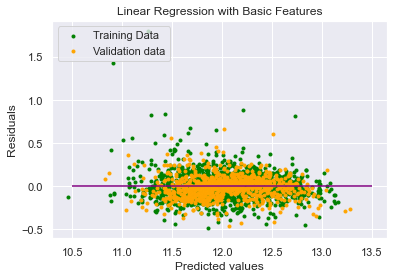

In [100]:
plt.scatter(y_train_pred, y_train_pred - y_train, c='green', marker='.', label= 'Training Data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='orange', marker='.', label = 'Validation data')
plt.title('Linear Regression with Basic Features')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y = 0, xmin=10.5, xmax=13.5, color='purple')
plt.show()

Below we can see that the model works fairly well.

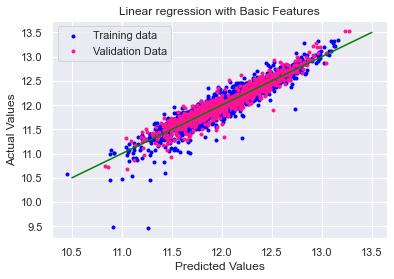

In [101]:
plt.scatter(y_train_pred, y_train, c = 'blue', marker='.', label = 'Training data')
plt.scatter(y_test_pred, y_test, c = 'deeppink', marker='.', label = 'Validation Data')
plt.title('Linear regression with Basic Features')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.legend(loc = 'upper left')
plt.plot([10.5, 13.5], [10.5, 13.5], c = 'green')
plt.show()

ii. Multiple Linear Regression Model with Random Forest Feature Selection

The multiple regression model with Random Forest selected variables does perform better pushing the RSME on the test data to 0.1156826.  Of course, it includes a far larger number of features(71).  Again the residuals are tighly grouped around the mean error.

In [102]:
lr_rfSelect = LinearRegression()
lr_rfSelect.fit(X_train[select_feat], y_train)

print('RMSE on Training set: ', rmse_cv_train(lr_rfSelect, X_train[select_feat]).mean())
print('RMSE on Test set: ', rmse_cv_test(lr_rfSelect, X_test[select_feat]).mean())
y_train_rfF = lr_rfSelect.predict(X_train[select_feat])
y_test_rfF = lr_rfSelect.predict(X_test[select_feat])
print('R2 for training data: ', r2_score(y_train, y_train_rfF))
print('R2 for test data: ', r2_score(y_test, y_test_rfF))

RMSE on Training set:  0.1233894173422283
RMSE on Test set:  0.11568261811630884
R2 for training data:  0.9165005363895302
R2 for test data:  0.9140056343201566


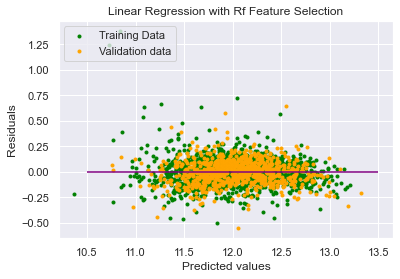

In [103]:
plt.scatter(y_train_rfF, y_train_rfF - y_train, c='green', marker='.', label= 'Training Data')
plt.scatter(y_test_rfF, y_test_rfF - y_test, c='orange', marker='.', label = 'Validation data')
plt.title('Linear Regression with Rf Feature Selection')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y = 0, xmin=10.5, xmax=13.5, color='purple')
plt.show()

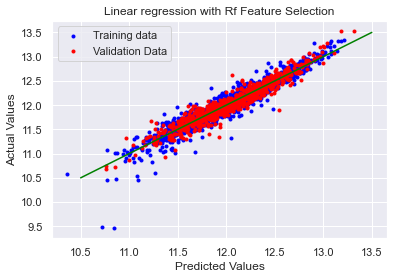

In [104]:
plt.scatter(y_train_rfF, y_train, c = 'blue', marker='.', label = 'Training data')
plt.scatter(y_test_rfF, y_test, c = 'red', marker='.', label = 'Validation Data')
plt.title('Linear regression with Rf Feature Selection')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.legend(loc = 'upper left')
plt.plot([10.5, 13.5], [10.5, 13.5], c = 'green')
plt.show()

iii. Lasso Regression Model

Here I diverge a little bit from my previous method of using the Lasso selected variables in a Multiple Linear Regression Model.  Instead, I implement the Lasso Regressor.

Not surprisingly, it is the best performing of my intial models with an RSME on the test data of 0.106162.

What I wanted to check though was whether it would select the same variables as the SelectFromModel module implementation.  It seems to have worked.

In [105]:
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1], max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print('Best alpha: ', alpha)

Best alpha:  0.0006


In [106]:
lasso_A = LassoCV(alphas = [alpha*0.6, alpha * 0.65, alpha * 0.7, alpha * 0.75, alpha * 0.8, alpha * 0.9, alpha * 0.95, alpha * 1.05, alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], max_iter=50000, cv = 10)
lasso_A.fit(X_train, y_train)
print('Best alpha: ', alpha)

print('Lasso RMSE on Training set: ', rmse_cv_train(lasso_A, X_train).mean())
print('Lasso RMSE on Test set: ', rmse_cv_test(lasso_A, X_test).mean())

y_train_las = lasso_A.predict(X_train)
y_test_las = lasso_A.predict(X_test)
print('R2 for training data: ', r2_score(y_train, y_train_las))
print('R2 for test data: ', r2_score(y_test, y_test_las))

Best alpha:  0.0006
Lasso RMSE on Training set:  0.11512017229277713
Lasso RMSE on Test set:  0.10616235978114272
R2 for training data:  0.9309767888081866
R2 for test data:  0.9287447075001798


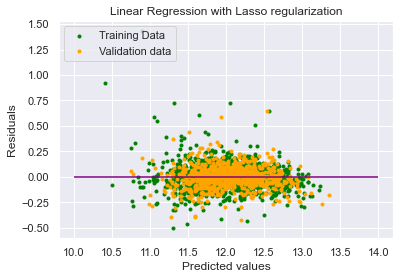

In [107]:
plt.scatter(y_train_las, y_train_las - y_train, c='green', marker='.', label= 'Training Data')
plt.scatter(y_test_las, y_test_las - y_test, c='orange', marker='.', label = 'Validation data')
plt.title('Linear Regression with Lasso regularization')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y = 0, xmin=10, xmax=14, color='purple')
plt.show()

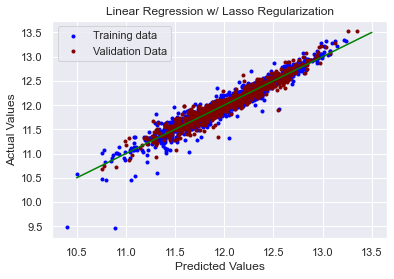

In [108]:
plt.scatter(y_train_las, y_train, c = 'blue', marker='.', label = 'Training data')
plt.scatter(y_test_las, y_test, c = 'maroon', marker='.', label = 'Validation Data')
plt.title('Linear Regression w/ Lasso Regularization')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.legend(loc = 'upper left')
plt.plot([10.5, 13.5], [10.5, 13.5], c = 'green')
plt.show()

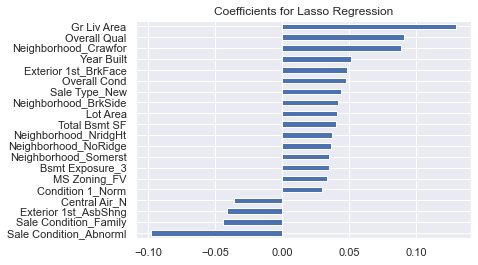

In [109]:
coeffs = pd.Series(lasso.coef_, index=X_train.columns)

key_coeffs = pd.concat([coeffs.sort_values().head(4), coeffs.sort_values().tail(16)])
key_coeffs.plot(kind='barh')
plt.title('Coefficients for Lasso Regression')
plt.show()